# <span id="1">1. The problem</span><a href="#1.-The-problem" class="anchor-link">¶</a>

This dataset contains information on default payments, demographic
factors, credit data, history of payment, and bill statements of credit
card clients in Taiwan from April 2005 to September 2005.

Our goal is to find the best model that is able to identify whether a
credit card holder will default in the next months payment. The model
will be based on the demographic attributes of the card holder and
his/her history of past payments.

we are trying to predict Whether a client will default from a credit
card loan next month

the application can be:

the lending institutions will be able to use our final model to reduce
the high delinquency rate by correctly classifying the credit card
defaulters and non-defaulters. Have a clear understading about the
current default rate of their outstanding loans

# <span id="1111">2. Evaluation</span><a href="#2.-Evaluation" class="anchor-link">¶</a>

The metrics we choose: a. F-Beta score, With Beta = 1.5. We know that
usually the Beta is either 2 or 0.5, and we care more about our model to
have better recall, but we did not wanted to be that harsh to set Beta =
2, so we choose Beta = 1.5.

we care about recall because: We want a clear picture of out of all the
real positive cases, how many are predicet positive - meaning recall.
This will give our firm a clear picture of the defualt rate it currently
has.

b\. AUC is an evaluation of the classifier as threshold varies over all
possible values. It is in a sense a broader metric, testing the quality
of the internal value that the classifier generates and then compares to
a threshold. After we will develop our model, the bank's risk management
team can use thier business understanding to modify the threshold.

We split that data as follows: 80% Train set (Which we going to train to
model on, and using K-fold choose our model and will use for the
hypertuning) 20% Test set (Which we will use only at the last part for
evaluate the model)

# <span id="1">3. Dataset description</span><a href="#3.-Dataset-description" class="anchor-link">¶</a>

a\. There are 24 features with 30,000 total instances

b\. The age column and Sex column has \~0.03% NA. We omitted thoese
rows.

c\. We can see in the following charts the distribution of the labels.

### Content<a href="#Content" class="anchor-link">¶</a>

There are 25 variables:

-   ID: ID of each client
-   LIMIT_BAL: Amount of given credit in NT dollars (includes individual
    and family/supplementary = credit)
-   SEX: Gender (1=male, 2=female)
-   EDUCATION: (1=graduate school, 2=university, 3=high school,
    4=others, 5=unknown, 6=unknown)
-   MARRIAGE: Marital status (1=married, 2=single, 3=others)
-   AGE: Age in years
-   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment
    delay for one month, 2=payment delay for two months, … 8=payment
    delay for eight months, 9=payment delay for nine months and above)
-   PAY_2: Repayment status in August, 2005 (scale same as above)
-   PAY_3: Repayment status in July, 2005 (scale same as above)
-   PAY_4: Repayment status in June, 2005 (scale same as above)
-   PAY_5: Repayment status in May, 2005 (scale same as above)
-   PAY_6: Repayment status in April, 2005 (scale same as above)
-   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
-   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
-   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
-   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
-   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
-   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
-   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
-   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
-   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
-   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
-   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
-   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
-   default.payment.next.month: Default payment (1=yes, 0=no)

### Additional Information<a href="#Additional-Information" class="anchor-link">¶</a>

-   Education (0, 4, 5, 6 = others. we will be opting to group '0','5'
    and '6' together)
-   Marital status (3 = divorce; 0=others)
-   PAY_AMTX: (-2 = No consumption; -1 = Paid in full; 0 = The use of
    revolving credit)

# <span id="2">Importing Packages and First Look at the Data</span><a href="#Importing-Packages-and-First-Look-at-the-Data"
class="anchor-link">¶</a>

In \[2\]:

    import pandas as pd       
    import matplotlib as mat
    import matplotlib.pyplot as plt    
    import numpy as np
    import seaborn as sns
    %matplotlib inline

    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.preprocessing import LabelEncoder

    from sklearn.ensemble import RandomForestClassifier

    import warnings
    warnings.filterwarnings('ignore')

In \[3\]:

    df = pd.read_csv('default of credit card clients.csv', index_col = 'ID')

In \[4\]:

    df.head()

Out\[4\]:

|     | LIMIT_BAL | SEX    | EDUCATION  | MARRIAGE | AGE | PAY_0 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | ... | BILL_AMT4 | BILL_AMT5 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 | DEFAULT |
|-----|-----------|--------|------------|----------|-----|-------|-------|-------|-------|-------|-----|-----------|-----------|-----------|----------|----------|----------|----------|----------|----------|---------|
| ID  |           |        |            |          |     |       |       |       |       |       |     |           |           |           |          |          |          |          |          |          |         |
| 1   | 20000     | female | university | married  | 24  | 2     | 2     | -1    | -1    | -2    | ... | 0         | 0         | 0         | 0        | 689      | 0        | 0        | 0        | 0        | 1       |
| 2   | 120000    | female | university | single   | 26  | -1    | 2     | 0     | 0     | 0     | ... | 3272      | 3455      | 3261      | 0        | 1000     | 1000     | 1000     | 0        | 2000     | 1       |
| 3   | 90000     | female | university | single   | 34  | 0     | 0     | 0     | 0     | 0     | ... | 14331     | 14948     | 15549     | 1518     | 1500     | 1000     | 1000     | 1000     | 5000     | 0       |
| 4   | 50000     | female | university | married  | 37  | 0     | 0     | 0     | 0     | 0     | ... | 28314     | 28959     | 29547     | 2000     | 2019     | 1200     | 1100     | 1069     | 1000     | 0       |
| 5   | 50000     | male   | university | married  | 57  | -1    | 0     | -1    | 0     | 0     | ... | 20940     | 19146     | 19131     | 2000     | 36681    | 10000    | 9000     | 689      | 679      | 0       |

5 rows × 24 columns

Changing ‘PAY_0 to PAY_1’ to keep in the same pattern as the other
‘September’ features . Changing Default's name to make it shorter.

In \[5\]:

    df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)
    df

Out\[5\]:

|       | LIMIT_BAL | SEX    | EDUCATION   | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | ... | BILL_AMT4 | BILL_AMT5 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 | DEFAULT |
|-------|-----------|--------|-------------|----------|-----|-------|-------|-------|-------|-------|-----|-----------|-----------|-----------|----------|----------|----------|----------|----------|----------|---------|
| ID    |           |        |             |          |     |       |       |       |       |       |     |           |           |           |          |          |          |          |          |          |         |
| 1     | 20000     | female | university  | married  | 24  | 2     | 2     | -1    | -1    | -2    | ... | 0         | 0         | 0         | 0        | 689      | 0        | 0        | 0        | 0        | 1       |
| 2     | 120000    | female | university  | single   | 26  | -1    | 2     | 0     | 0     | 0     | ... | 3272      | 3455      | 3261      | 0        | 1000     | 1000     | 1000     | 0        | 2000     | 1       |
| 3     | 90000     | female | university  | single   | 34  | 0     | 0     | 0     | 0     | 0     | ... | 14331     | 14948     | 15549     | 1518     | 1500     | 1000     | 1000     | 1000     | 5000     | 0       |
| 4     | 50000     | female | university  | married  | 37  | 0     | 0     | 0     | 0     | 0     | ... | 28314     | 28959     | 29547     | 2000     | 2019     | 1200     | 1100     | 1069     | 1000     | 0       |
| 5     | 50000     | male   | university  | married  | 57  | -1    | 0     | -1    | 0     | 0     | ... | 20940     | 19146     | 19131     | 2000     | 36681    | 10000    | 9000     | 689      | 679      | 0       |
| ...   | ...       | ...    | ...         | ...      | ... | ...   | ...   | ...   | ...   | ...   | ... | ...       | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...      | ...     |
| 29996 | 220000    | male   | high school | married  | 39  | 0     | 0     | 0     | 0     | 0     | ... | 88004     | 31237     | 15980     | 8500     | 20000    | 5003     | 3047     | 5000     | 1000     | 0       |
| 29997 | 150000    | male   | high school | single   | 43  | -1    | -1    | -1    | -1    | 0     | ... | 8979      | 5190      | 0         | 1837     | 3526     | 8998     | 129      | 0        | 0        | 0       |
| 29998 | 30000     | male   | university  | single   | 37  | 4     | 3     | 2     | -1    | 0     | ... | 20878     | 20582     | 19357     | 0        | 0        | 22000    | 4200     | 2000     | 3100     | 1       |
| 29999 | 80000     | male   | high school | married  | 41  | 1     | -1    | 0     | 0     | 0     | ... | 52774     | 11855     | 48944     | 85900    | 3409     | 1178     | 1926     | 52964    | 1804     | 1       |
| 30000 | 50000     | male   | university  | married  | 46  | 0     | 0     | 0     | 0     | 0     | ... | 36535     | 32428     | 15313     | 2078     | 1800     | 1430     | 1000     | 1000     | 1000     | 1       |

30000 rows × 24 columns

In \[6\]:

    df.isna().sum()

Out\[6\]:

    LIMIT_BAL     0
    SEX           0
    EDUCATION    14
    MARRIAGE     54
    AGE           0
    PAY_1         0
    PAY_2         0
    PAY_3         0
    PAY_4         0
    PAY_5         0
    PAY_6         0
    BILL_AMT1     0
    BILL_AMT2     0
    BILL_AMT3     0
    BILL_AMT4     0
    BILL_AMT5     0
    BILL_AMT6     0
    PAY_AMT1      0
    PAY_AMT2      0
    PAY_AMT3      0
    PAY_AMT4      0
    PAY_AMT5      0
    PAY_AMT6      0
    DEFAULT       0
    dtype: int64

Apparently, there are small number of missing values.

In \[7\]:

    df.describe().T

Out\[7\]:

|           | count   | mean          | std           | min       | 25%      | 50%      | 75%       | max       |
|-----------|---------|---------------|---------------|-----------|----------|----------|-----------|-----------|
| LIMIT_BAL | 30000.0 | 167484.322667 | 129747.661567 | 10000.0   | 50000.00 | 140000.0 | 240000.00 | 1000000.0 |
| AGE       | 30000.0 | 35.485500     | 9.217904      | 21.0      | 28.00    | 34.0     | 41.00     | 79.0      |
| PAY_1     | 30000.0 | -0.016700     | 1.123802      | -2.0      | -1.00    | 0.0      | 0.00      | 8.0       |
| PAY_2     | 30000.0 | -0.133767     | 1.197186      | -2.0      | -1.00    | 0.0      | 0.00      | 8.0       |
| PAY_3     | 30000.0 | -0.166200     | 1.196868      | -2.0      | -1.00    | 0.0      | 0.00      | 8.0       |
| PAY_4     | 30000.0 | -0.220667     | 1.169139      | -2.0      | -1.00    | 0.0      | 0.00      | 8.0       |
| PAY_5     | 30000.0 | -0.266200     | 1.133187      | -2.0      | -1.00    | 0.0      | 0.00      | 8.0       |
| PAY_6     | 30000.0 | -0.291100     | 1.149988      | -2.0      | -1.00    | 0.0      | 0.00      | 8.0       |
| BILL_AMT1 | 30000.0 | 51223.330900  | 73635.860576  | -165580.0 | 3558.75  | 22381.5  | 67091.00  | 964511.0  |
| BILL_AMT2 | 30000.0 | 49179.075167  | 71173.768783  | -69777.0  | 2984.75  | 21200.0  | 64006.25  | 983931.0  |
| BILL_AMT3 | 30000.0 | 47013.154800  | 69349.387427  | -157264.0 | 2666.25  | 20088.5  | 60164.75  | 1664089.0 |
| BILL_AMT4 | 30000.0 | 43262.948967  | 64332.856134  | -170000.0 | 2326.75  | 19052.0  | 54506.00  | 891586.0  |
| BILL_AMT5 | 30000.0 | 40311.400967  | 60797.155770  | -81334.0  | 1763.00  | 18104.5  | 50190.50  | 927171.0  |
| BILL_AMT6 | 30000.0 | 38871.760400  | 59554.107537  | -339603.0 | 1256.00  | 17071.0  | 49198.25  | 961664.0  |
| PAY_AMT1  | 30000.0 | 5663.580500   | 16563.280354  | 0.0       | 1000.00  | 2100.0   | 5006.00   | 873552.0  |
| PAY_AMT2  | 30000.0 | 5921.163500   | 23040.870402  | 0.0       | 833.00   | 2009.0   | 5000.00   | 1684259.0 |
| PAY_AMT3  | 30000.0 | 5225.681500   | 17606.961470  | 0.0       | 390.00   | 1800.0   | 4505.00   | 896040.0  |
| PAY_AMT4  | 30000.0 | 4826.076867   | 15666.159744  | 0.0       | 296.00   | 1500.0   | 4013.25   | 621000.0  |
| PAY_AMT5  | 30000.0 | 4799.387633   | 15278.305679  | 0.0       | 252.50   | 1500.0   | 4031.50   | 426529.0  |
| PAY_AMT6  | 30000.0 | 5215.502567   | 17777.465775  | 0.0       | 117.75   | 1500.0   | 4000.00   | 528666.0  |
| DEFAULT   | 30000.0 | 0.221200      | 0.415062      | 0.0       | 0.00     | 0.0      | 0.00      | 1.0       |

At first, some minimum values stood out for not matching the
descriptions of their features (Education = 0, Marriage = 0 and PAY_X
features = -2). For ‘Education’ and ‘Marriage’, the zero values could
have been used to replace missing values. The ‘-2’ on PAY_X didn’t have
an explanation, at least without a deep look on the data, but it should
mean something positive, similar to ‘-1’ (‘-2’, ‘-1’ and ‘0’ were
associated with lower chance of default). For now, we decided not to
change thoese unqique values.

The negative values on BILL_AMTX also seemed odd, but it could simply
mean that the customers paid more than their actual debts. A lower
probability of default is expected for those customers.

# <span id="3">Exploratory Data Analysis</span><a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

First, we will look at the distribution of the target variable
(Default). Then, we'll move on to the features, looking at their
distributions, their relationships to the target, and, in some cases,
the relationships among some of them.

In \[8\]:

    df.columns = df.columns.str.replace('DEFAULT', 'Default')

## Default<a href="#Default" class="anchor-link">¶</a>

In \[9\]:

    plt.figure(figsize=(6,4))

    ax = sns.countplot(x="Default", data=df, palette="crest")

    plt.xlabel("Default?", fontsize= 12)
    plt.ylabel("# of Clients", fontsize= 12)
    plt.ylim(0,30000)
    plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
        
    plt.show()

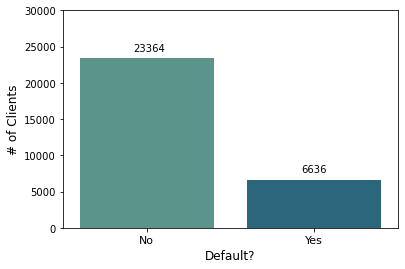

In \[10\]:

    plt.figure(figsize=(7,5))

    df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['green','grey'], explode = [0,0.05], textprops = {"fontsize":15})

    plt.legend(labels=['No Default', 'Default'])
    plt.show()

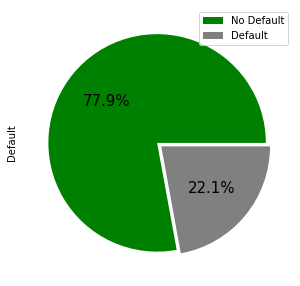

## <span id="31">Demographic Features</span><a href="#Demographic-Features" class="anchor-link">¶</a>

## Sex<a href="#Sex" class="anchor-link">¶</a>

In \[11\]:

    df['SEX'].value_counts()

Out\[11\]:

    female    18112
    male      11888
    Name: SEX, dtype: int64

In \[12\]:

    df['Default'].groupby(df['SEX']).value_counts(normalize = True)

Out\[12\]:

    SEX     Default
    female  0          0.792237
            1          0.207763
    male    0          0.758328
            1          0.241672
    Name: Default, dtype: float64

In \[13\]:

    plt.figure(figsize=(12,4))

    ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'crest')

    plt.xlabel("Sex", fontsize= 12)
    plt.ylabel("# of Clients", fontsize= 12)
    plt.ylim(0,20000)
    plt.xticks([0,1],['Female', 'Male'], fontsize = 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

    plt.show()

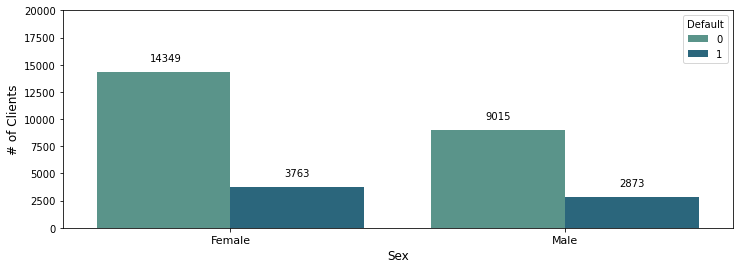

In \[14\]:

    plt.figure(figsize=(10,4))

    ax = sns.barplot(x = "SEX", y = "Default", data = df, palette = 'crest', ci = None)

    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1],['Female', 'Male'], fontsize = 12)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

    plt.show()

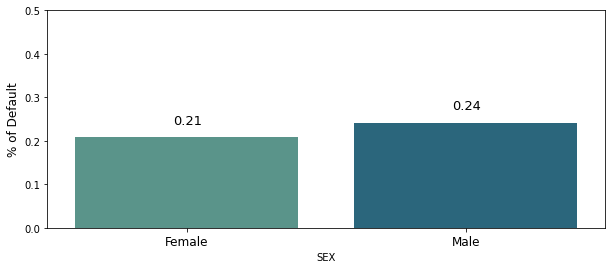

There are more women than men in our dataset and, apparently, men have a
slightly higher chance of default. We will try to confirm it a little
later by comparing men and women with the same education and marital
status.

## Education<a href="#Education" class="anchor-link">¶</a>

As we saw on the descriptive statistics (df.describe), there is a
minimum value of 0 in 'Education', which didn't match the possible
values for this feature according to the original dataset information.
The additional information puts 4 values (0, 4, 5, 6) in the same
category ('others').

The values '5' and '6' are both originally labelled as 'unknown' and we
don't have a defined label for '0'. Maybe we can put them all together
in the same category. But first, we will leave it as it is for now and
check how many samples there are in each category and what is their
percentage of Default.

In \[15\]:

    df['EDUCATION'].value_counts()

Out\[15\]:

    university         14030
    graduate school    10585
    high school         4917
    unknown              331
    others               123
    Name: EDUCATION, dtype: int64

In \[16\]:

    df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

Out\[16\]:

    EDUCATION        Default
    graduate school  0          0.807652
                     1          0.192348
    high school      0          0.748424
                     1          0.251576
    others           0          0.943089
                     1          0.056911
    university       0          0.762651
                     1          0.237349
    unknown          0          0.921450
                     1          0.078550
    Name: Default, dtype: float64

There are few people on the 'unknown' categories (0, 5, 6) and, although
their probabilities of default are not exactly close, all of them are
lower than the probabilities found for the 'well defined' labels (1, 2
and 3). we'll be making the choice of putting them together with the
same value.

In \[17\]:

    df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
    df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In \[18\]:

    df['EDUCATION'].value_counts()

Out\[18\]:

    university         14030
    graduate school    10585
    high school         4917
    unknown              331
    others               123
    Name: EDUCATION, dtype: int64

In \[19\]:

    df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

Out\[19\]:

    EDUCATION        Default
    graduate school  0          0.807652
                     1          0.192348
    high school      0          0.748424
                     1          0.251576
    others           0          0.943089
                     1          0.056911
    university       0          0.762651
                     1          0.237349
    unknown          0          0.921450
                     1          0.078550
    Name: Default, dtype: float64

In \[20\]:

    plt.figure(figsize=(12,4))

    ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'crest')

    plt.xlabel("Education", fontsize= 12)
    plt.ylabel("# of Clients", fontsize= 12)
    plt.ylim(0,12000)
    plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

    plt.show()

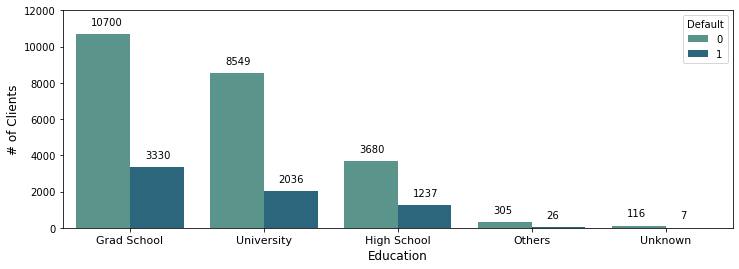

In \[21\]:

    plt.figure(figsize=(12,4))

    ax = sns.barplot(x = "EDUCATION", y = "Default", data = df, palette = 'crest', ci = None)

    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

    plt.show()

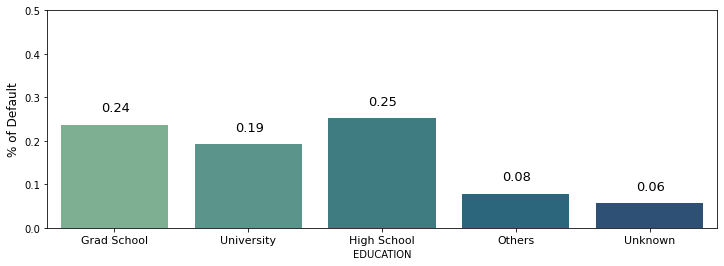

The predominant level of education in our dataset is 'University',
followed by 'Grad School', 'High School', 'Unknown' and 'Others'.

Considering only the first three levels, it seems that a higher
education translates to a lower chance of default. However, both
'Unknown' and 'Others' (which we would presume that it means a lower
level than high school), have a noticeably lower probability.

## Marital Status<a href="#Marital-Status" class="anchor-link">¶</a>

In \[22\]:

    df['MARRIAGE'].value_counts()

Out\[22\]:

    single     15964
    married    13659
    others       323
    Name: MARRIAGE, dtype: int64

In \[23\]:

    df['Default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

Out\[23\]:

    MARRIAGE  Default
    married   0          0.765283
              1          0.234717
    others    0          0.739938
              1          0.260062
    single    0          0.790717
              1          0.209283
    Name: Default, dtype: float64

In \[24\]:

    plt.figure(figsize=(12,4))

    ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'crest')

    plt.xlabel("Marital Status", fontsize= 12)
    plt.ylabel("# of Clients", fontsize= 12)
    plt.ylim(0,15000)
    plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

    plt.show()

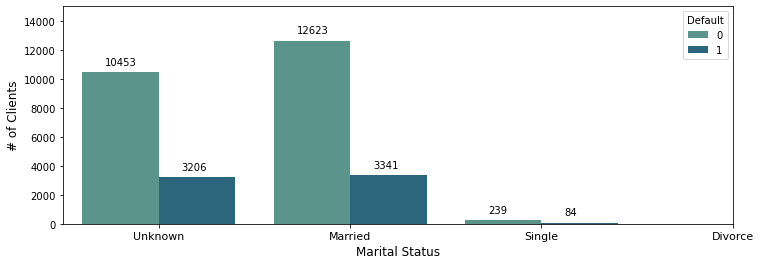

In \[25\]:

    plt.figure(figsize=(12,4))

    ax = sns.barplot(x = "MARRIAGE", y = "Default", data = df, palette = 'crest', ci = None)

    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

    plt.show()

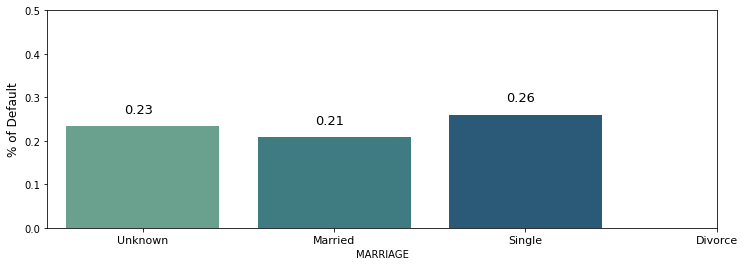

As expected, most people fall either on the 'Married' or 'Single'
category.

Once again, the 'Unknown' category present a lower probability of
default. Among the rest, those who are married also have a slight lower
chance of default.

## Sex + Education/Marital Status<a href="#Sex-+-Education/Marital-Status" class="anchor-link">¶</a>

We've seen that men apparently are more likely to default than women. We
can be a little more sure by comparing them considering similar
education levels and marital status.

In \[26\]:

    df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)

Out\[26\]:

    MARRIAGE  SEX     Default
    married   female  0          0.780375
                      1          0.219625
              male    0          0.740655
                      1          0.259345
    others    female  0          0.770833
                      1          0.229167
              male    0          0.694656
                      1          0.305344
    single    female  0          0.802784
                      1          0.197216
              male    0          0.773386
                      1          0.226614
    Name: Default, dtype: float64

In \[27\]:

    plt.figure(figsize=(12,4))

    ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'crest', ci = None)

    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1],['Female', 'Male'], fontsize = 12)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

    plt.show()

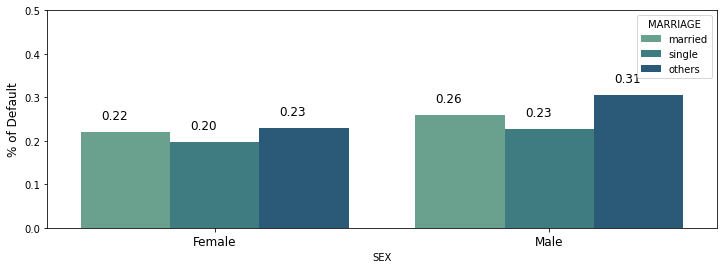

In \[28\]:

    df.groupby(by=['EDUCATION', 'SEX'])['Default'].value_counts(normalize = True)

Out\[28\]:

    EDUCATION        SEX     Default
    graduate school  female  0          0.818649
                             1          0.181351
                     male    0          0.791915
                             1          0.208085
    high school      female  0          0.763580
                             1          0.236420
                     male    0          0.726131
                             1          0.273869
    others           female  0          0.962963
                             1          0.037037
                     male    0          0.904762
                             1          0.095238
    university       female  0          0.777957
                             1          0.222043
                     male    0          0.737998
                             1          0.262002
    unknown          female  0          0.924171
                             1          0.075829
                     male    0          0.916667
                             1          0.083333
    Name: Default, dtype: float64

In \[29\]:

    plt.figure(figsize=(12,4))

    ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = df, palette = 'crest', ci = None)

    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1],['Female', 'Male'], fontsize = 12)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

    plt.show()

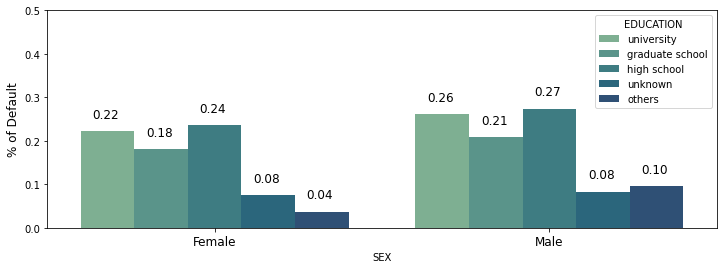

In every single comparison, the probability of default was higher for
men.

## Age<a href="#Age" class="anchor-link">¶</a>

In \[30\]:

    plt.figure(figsize=(12,4))

    sns.distplot(df['AGE'])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
    plt.ylabel('')
    plt.show()

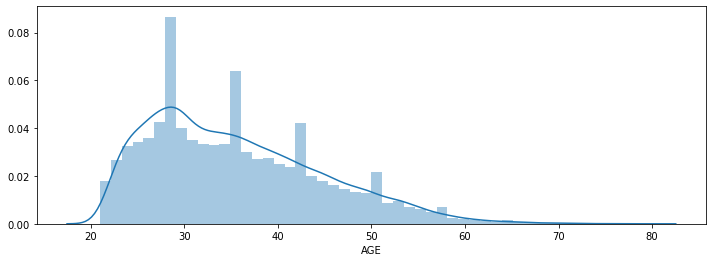

In \[31\]:

    plt.figure(figsize=(12,4))

    sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
    plt.ylabel('')
    plt.legend()
    plt.show()

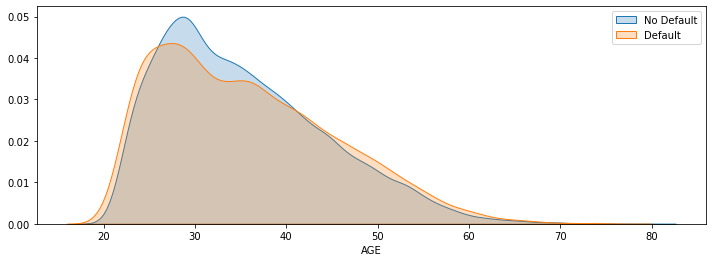

Most people in our dataset have between 25 and 40 years old. There is
also an impression that around that age the chance of default is a
little lower, but we could divide our dataset in bins and check the
percentage of default in each age group to be sure.

In \[32\]:

    df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
    print(df['AgeBin'].value_counts())

    (25, 30]    7142
    (40, 50]    6005
    (30, 35]    5796
    (35, 40]    4917
    (20, 25]    3871
    (50, 60]    1997
    (60, 80]     272
    Name: AgeBin, dtype: int64

In \[33\]:

    df['Default'].groupby(df['AgeBin']).value_counts(normalize = True)

Out\[33\]:

    AgeBin    Default
    (20, 25]  0          0.733402
              1          0.266598
    (25, 30]  0          0.798516
              1          0.201484
    (30, 35]  0          0.805728
              1          0.194272
    (35, 40]  0          0.783811
              1          0.216189
    (40, 50]  0          0.767027
              1          0.232973
    (50, 60]  0          0.747621
              1          0.252379
    (60, 80]  0          0.731618
              1          0.268382
    Name: Default, dtype: float64

In \[34\]:

    plt.figure(figsize=(12,4))

    df['AgeBin'] = df['AgeBin'].astype('str')
    AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

    ax = sns.countplot(data = df, x = 'AgeBin', hue="Default", palette = 'crest', order = AgeBin_order)

    plt.xlabel("Age Group", fontsize= 12)
    plt.ylabel("# of Clients", fontsize= 12)
    plt.ylim(0,8000)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

    plt.show()

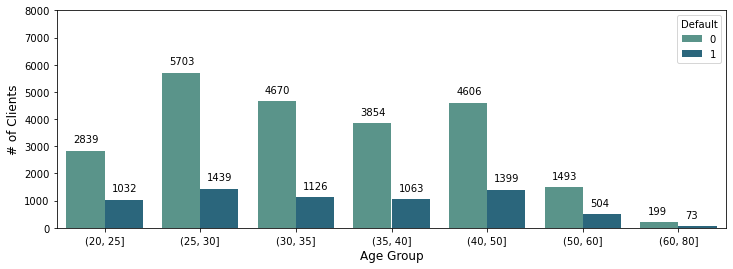

In \[35\]:

    plt.figure(figsize=(12,4))

    ax = sns.barplot(x = "AgeBin", y = "Default", data = df, palette = 'crest', ci = None, order = AgeBin_order)

    plt.xlabel("Age Group", fontsize= 12)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

    plt.show()

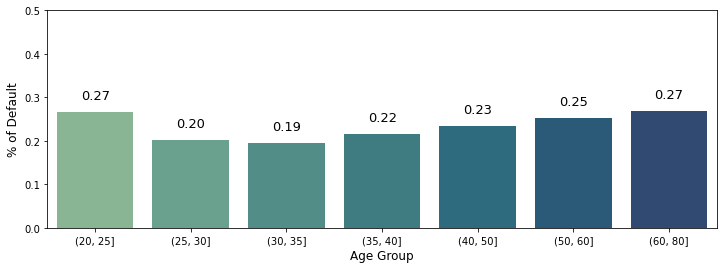

As expected, the lowest chances of default are registered around 30-35
years old, while the highest occur at the extremes (20-25 and 60+).

## <span id="32">Given Credit and Repayment Status</span><a href="#Given-Credit-and-Repayment-Status" class="anchor-link">¶</a>

## Amount of Given Credit (LIMIT_BAL)<a href="#Amount-of-Given-Credit-(LIMIT_BAL)" class="anchor-link">¶</a>

In \[36\]:

    plt.figure(figsize=(12,4))

    sns.distplot(df['LIMIT_BAL'])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
    plt.ylabel('')
    plt.show()

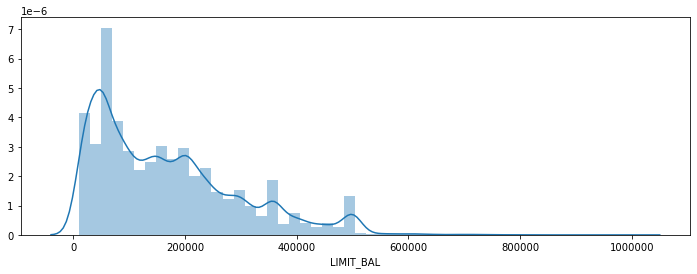

In \[37\]:

    plt.figure(figsize=(12,4))

    sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
    plt.ylabel('')
    plt.legend()
    plt.show()

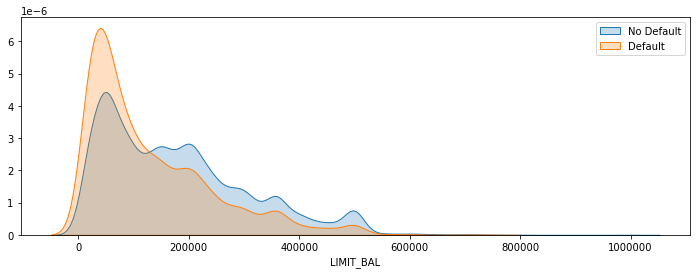

Most customers have 200k or less of credit limit. And it seems that we
will find a higher concentration of customers in default on that range.
We will split it into bins to get a clear look.

In \[38\]:

    df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
    print(df['LimitBin'].value_counts())

    (5000, 50000]        7676
    (200000, 300000]     5059
    (50000, 100000]      4822
    (150000, 200000]     3978
    (100000, 150000]     3902
    (300000, 400000]     2759
    (400000, 500000]     1598
    (500000, 1100000]     206
    Name: LimitBin, dtype: int64

In \[39\]:

    df['Default'].groupby(df['LimitBin']).value_counts(normalize = True)

Out\[39\]:

    LimitBin           Default
    (5000, 50000]      0          0.682126
                       1          0.317874
    (50000, 100000]    0          0.742016
                       1          0.257984
    (100000, 150000]   0          0.788570
                       1          0.211430
    (150000, 200000]   0          0.821518
                       1          0.178482
    (200000, 300000]   0          0.839494
                       1          0.160506
    (300000, 400000]   0          0.859369
                       1          0.140631
    (400000, 500000]   0          0.878598
                       1          0.121402
    (500000, 1100000]  0          0.888350
                       1          0.111650
    Name: Default, dtype: float64

In \[40\]:

    plt.figure(figsize=(14,4))

    df['LimitBin'] = df['LimitBin'].astype('str')
    LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                    '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

    ax = sns.countplot(data = df, x = 'LimitBin', hue="Default", palette = 'crest', order = LimitBin_order)

    plt.xlabel("Amount of Given Credit", fontsize= 12)
    plt.ylabel("# of Clients", fontsize= 12)
    plt.ylim(0,8000)
    ax.tick_params(axis="x", labelsize= 9.5)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

    plt.show()

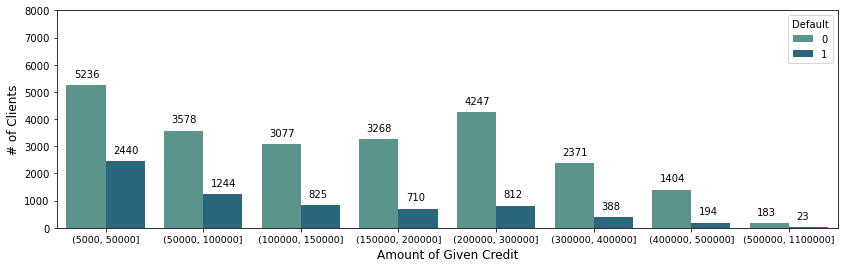

In \[41\]:

    plt.figure(figsize=(14,4))

    ax = sns.barplot(x = "LimitBin", y = "Default", data = df, palette = 'crest', ci = None, order = LimitBin_order)

    plt.xlabel("Amount of Given Credit", fontsize= 12)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

    plt.show()

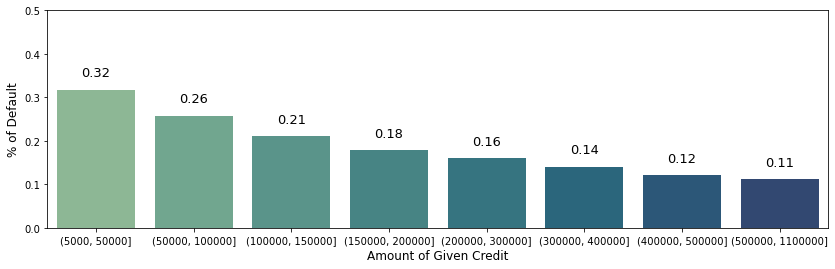

Now it's pretty clear that there is a significant rate of default (over
30%) from customers with 50k or less of credit limit. We also can see
that the higher the limit, the lower is the chance of defaulting.

## Amount of Given Credit (LIMIT_BAL) + Demographic Features<a href="#Amount-of-Given-Credit-(LIMIT_BAL)-+-Demographic-Features"
class="anchor-link">¶</a>

Let's take a look at the relationship among the amount of given credit
and the demographic features.

In \[42\]:

    df.groupby('SEX')['LIMIT_BAL'].mean()

Out\[42\]:

    SEX
    female    170086.462014
    male      163519.825034
    Name: LIMIT_BAL, dtype: float64

In \[43\]:

    plt.figure(figsize=(12,6))

    sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, palette = 'crest', showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
    plt.xticks([0,1],['Female', 'Male'], fontsize = 12)

    plt.show()

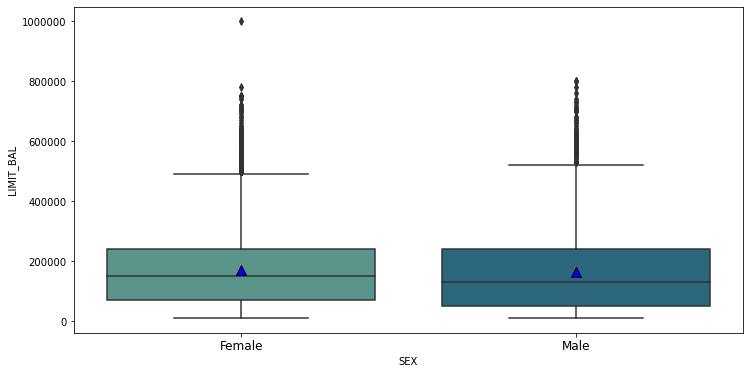

In \[44\]:

    df.groupby('EDUCATION')['LIMIT_BAL'].mean()

Out\[44\]:

    EDUCATION
    graduate school    212956.069910
    high school        126550.270490
    others             220894.308943
    university         147062.437634
    unknown            165093.655589
    Name: LIMIT_BAL, dtype: float64

In \[45\]:

    plt.figure(figsize=(14,6))

    sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'crest', showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
    plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

    plt.show()

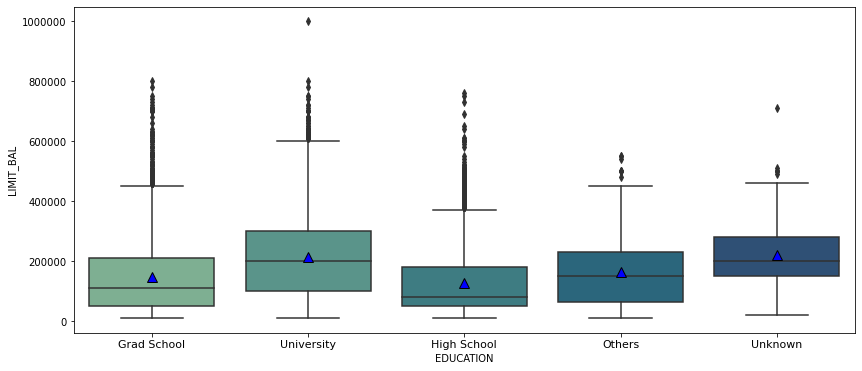

In \[46\]:

    df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

Out\[46\]:

    MARRIAGE
    married    182200.893184
    others      98080.495356
    single     156413.660737
    Name: LIMIT_BAL, dtype: float64

In \[47\]:

    plt.figure(figsize=(14,6))

    sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'crest', showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
    plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

    plt.show()

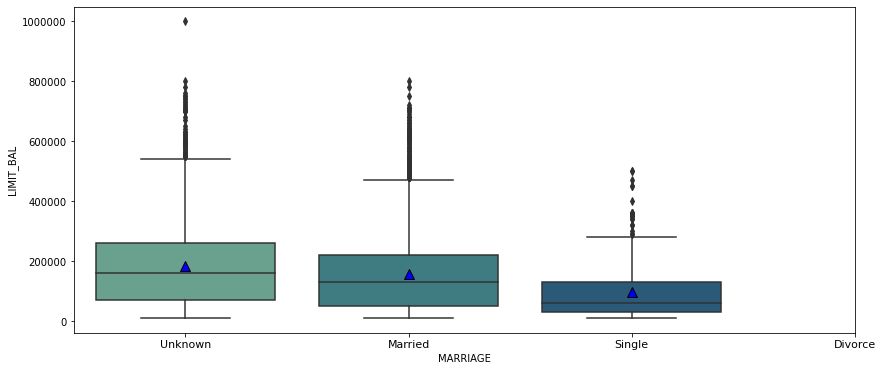

In \[48\]:

    df.groupby('AgeBin')['LIMIT_BAL'].mean()

Out\[48\]:

    AgeBin
    (20, 25]     73763.885301
    (25, 30]    164320.918510
    (30, 35]    197688.060732
    (35, 40]    196780.557250
    (40, 50]    179680.213156
    (50, 60]    159349.023535
    (60, 80]    201617.647059
    Name: LIMIT_BAL, dtype: float64

In \[49\]:

    plt.figure(figsize=(14,6))

    sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = df, palette = 'crest', order = AgeBin_order, showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
    plt.xlabel("Age Group", fontsize= 12)

    plt.show()

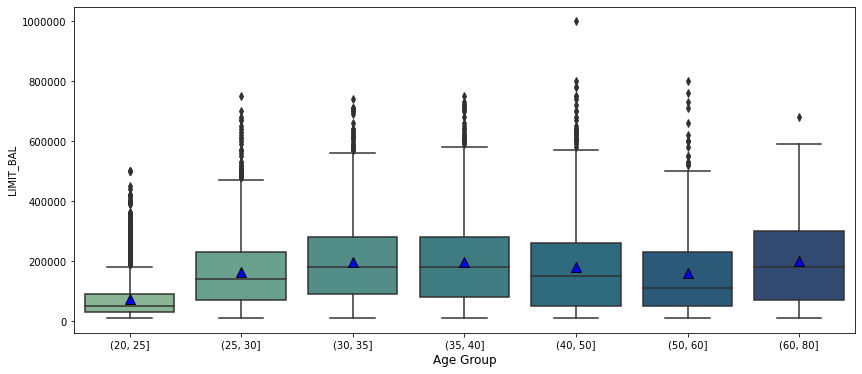

Overall, the offered credit limit seems to match the ability to pay in
time within each category. The exceptions are the unknown categories,
which have lower chances of default, but do not lead in the amount of
given credit, and the age group of 60+, which, despite having one of the
highest chances of default, receives, on average, the highest credit
value.by age group.

We could analyze the relationship between the credit limit and the
combination of two demographic features to see if we can find something
different. In this notebook, I’ll only plot the ‘sex’ feature combined
with the remaining demographic features.

In \[50\]:

    plt.figure(figsize=(14,6))

    sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'crest', showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
    plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

    plt.show()

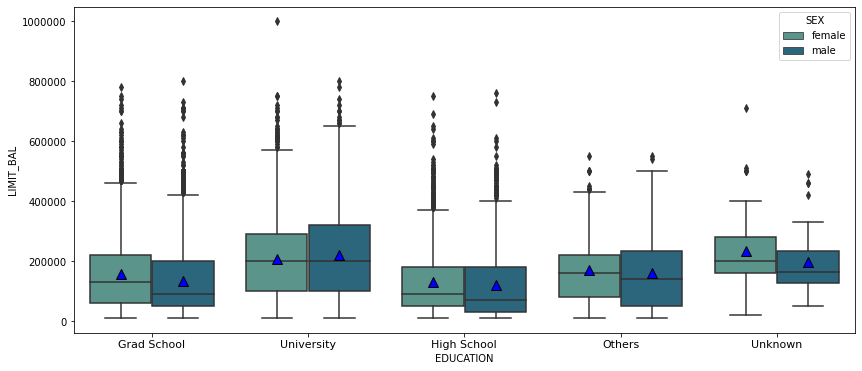

In \[51\]:

    plt.figure(figsize=(14,6))

    sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'crest', showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
    plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

    plt.show()

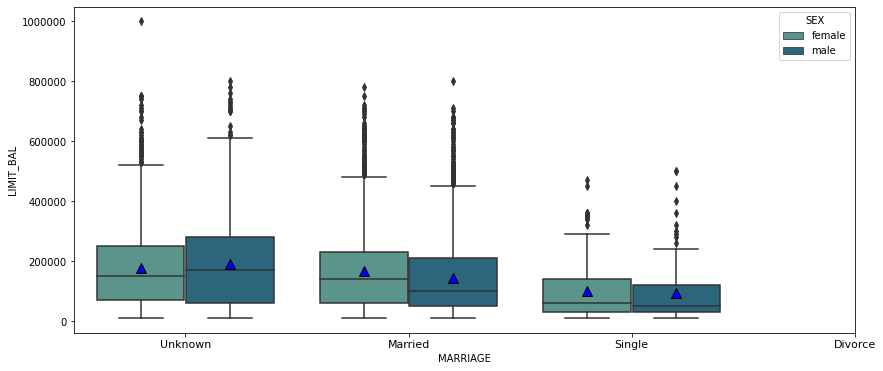

In \[52\]:

    plt.figure(figsize=(14,6))

    sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = df, palette = 'crest', order = AgeBin_order, showmeans=True, 
                meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

    plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
    plt.xlabel("Age Group", fontsize= 12)

    plt.show()

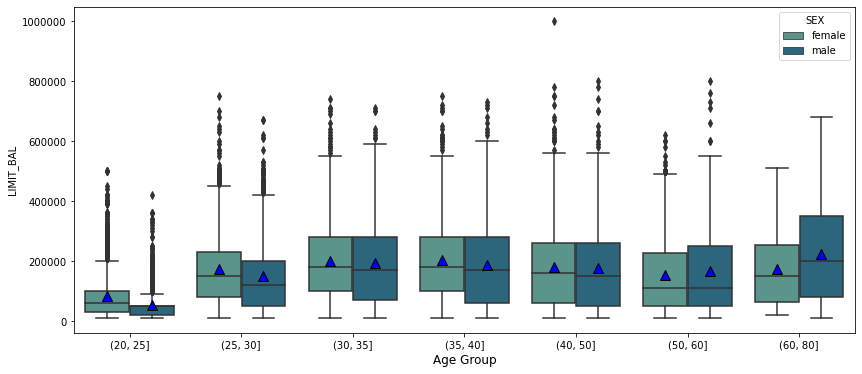

We saw earlier that the average given credit for women was slightly
higher than for men. That still holds up for several combinations of
categories, except among customers that:

-   Have a grad school diploma;
-   Are married;
-   Are 50+ years old.

## Repayment Status (PAY_X)<a href="#Repayment-Status-(PAY_X)" class="anchor-link">¶</a>

In \[53\]:

    pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_x_fts):    
        plt.subplot(3,2,i + 1)
        ax = sns.countplot(df.loc[:,col], palette = 'crest')
        plt.ylim(0,20000)
        plt.ylabel('')
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

    plt.show()

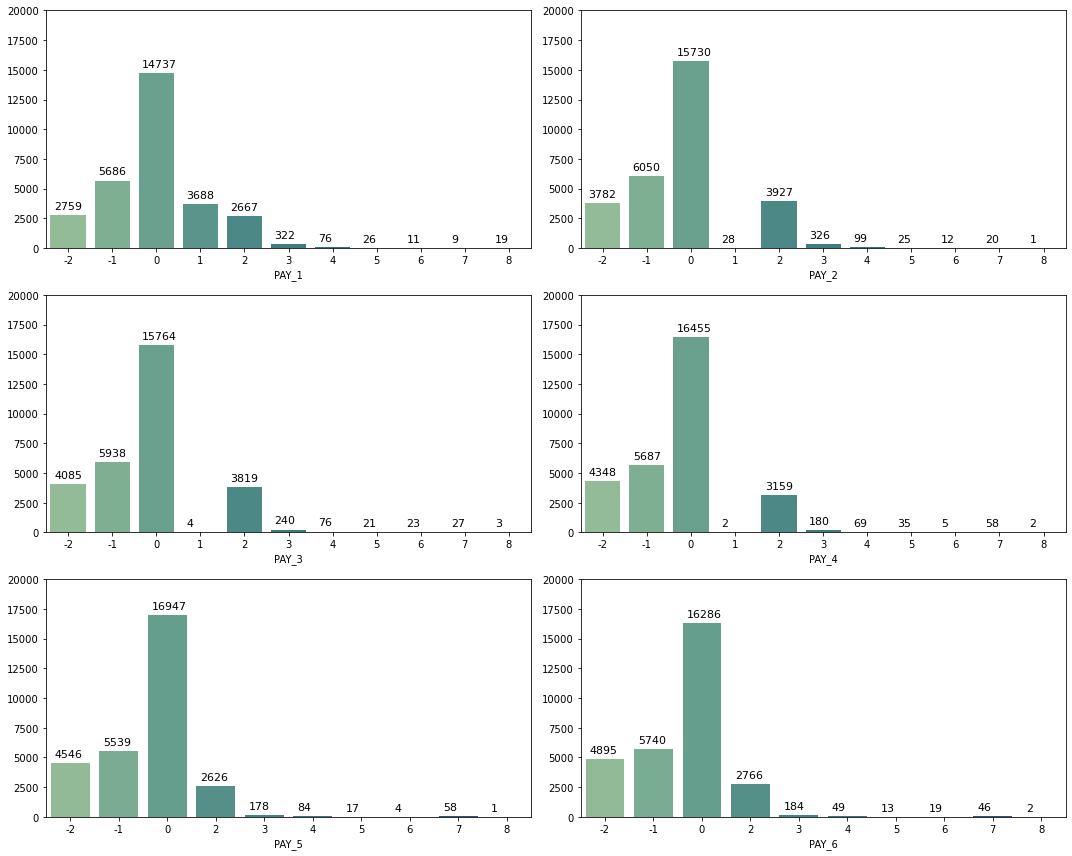

In \[54\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_x_fts):    
        plt.subplot(3,2,i + 1)
        ax = sns.barplot(x = col, y = "Default", data = df, palette = 'crest', ci = None)
        plt.ylabel("% of Default", fontsize= 12)
        plt.ylim(0,1.2)
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

    plt.show()

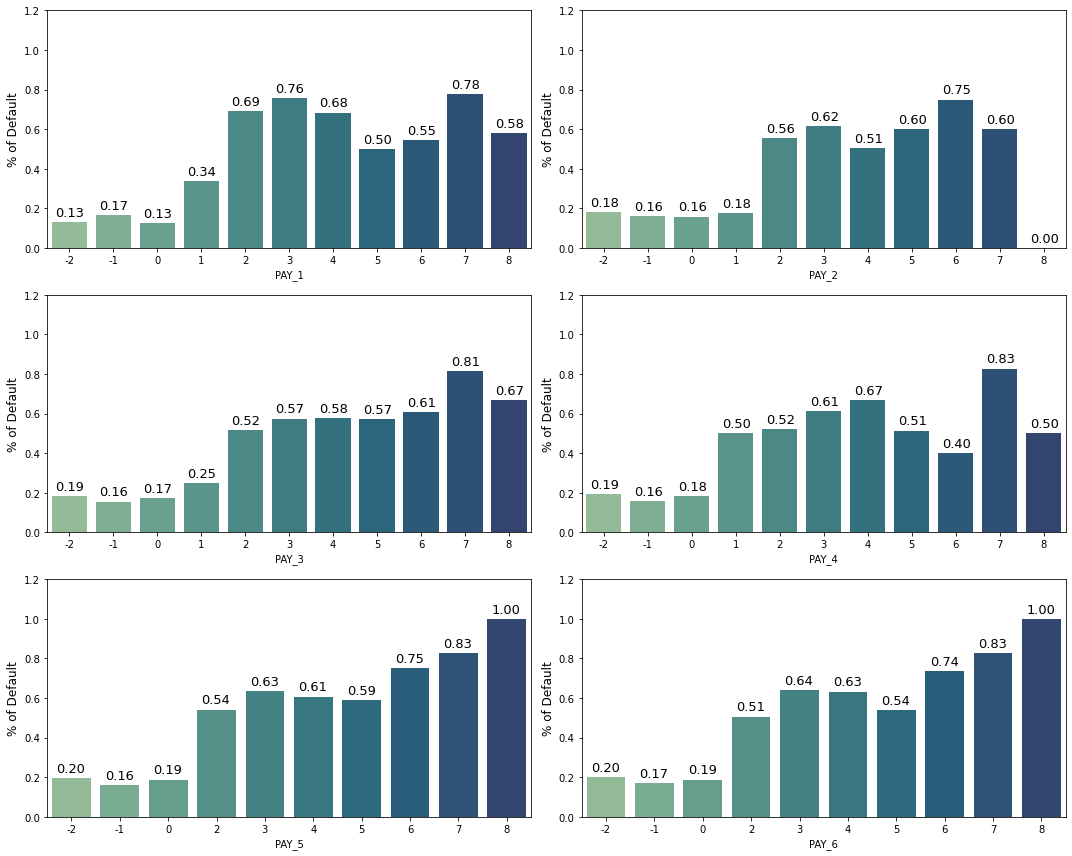

Most customers are duly paying their credit card bills. And it's pretty
clear that their likelihood of default are much lower than the rest.

Since there are only a few customers with 4+ months of delay in all
PAY_X features, we could make a new analysis with them all together just
to have the average default of a more significant group.

In \[55\]:

    df['PAY_1_new'] = df['PAY_1'].copy()
    df['PAY_2_new'] = df['PAY_2'].copy()
    df['PAY_3_new'] = df['PAY_3'].copy()
    df['PAY_4_new'] = df['PAY_4'].copy()
    df['PAY_5_new'] = df['PAY_5'].copy()
    df['PAY_6_new'] = df['PAY_6'].copy()

In \[56\]:

    pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

    for col in pay_x_new:  
        df.loc[:,col] = df.loc[:,col].replace(5,4)
        df.loc[:,col] = df.loc[:,col].replace(6,4)
        df.loc[:,col] = df.loc[:,col].replace(7,4)
        df.loc[:,col] = df.loc[:,col].replace(8,4)

In \[57\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_x_new):    
        plt.subplot(3,2,i + 1)
        ax = sns.countplot(data = df, x = col, palette = 'crest')
        plt.ylim(0,20000)
        plt.ylabel('')
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

    plt.show()

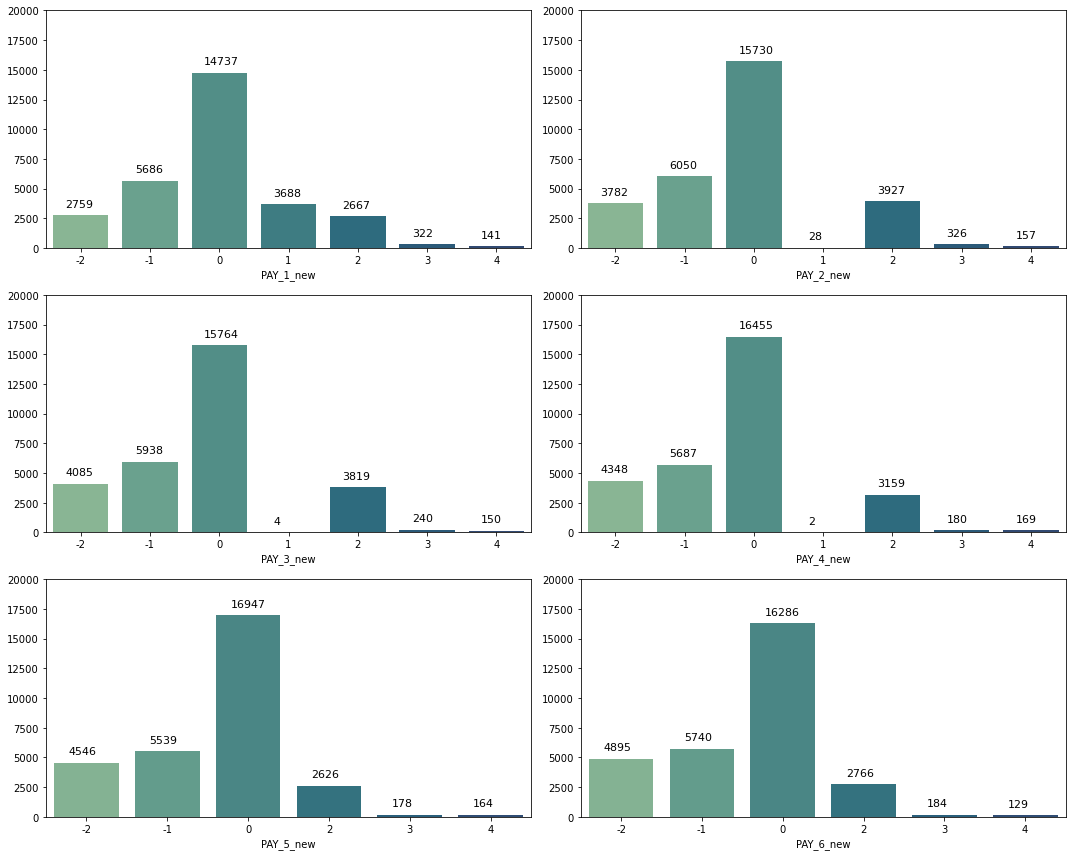

In \[58\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_x_new):    
        plt.subplot(3,2,i + 1)
        ax = sns.barplot(x = col, y = "Default", data = df, palette = 'crest', ci = None)
        plt.ylabel("% of Default", fontsize= 12)
        plt.ylim(0,1.0)
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03),fontsize=13)

    plt.show()

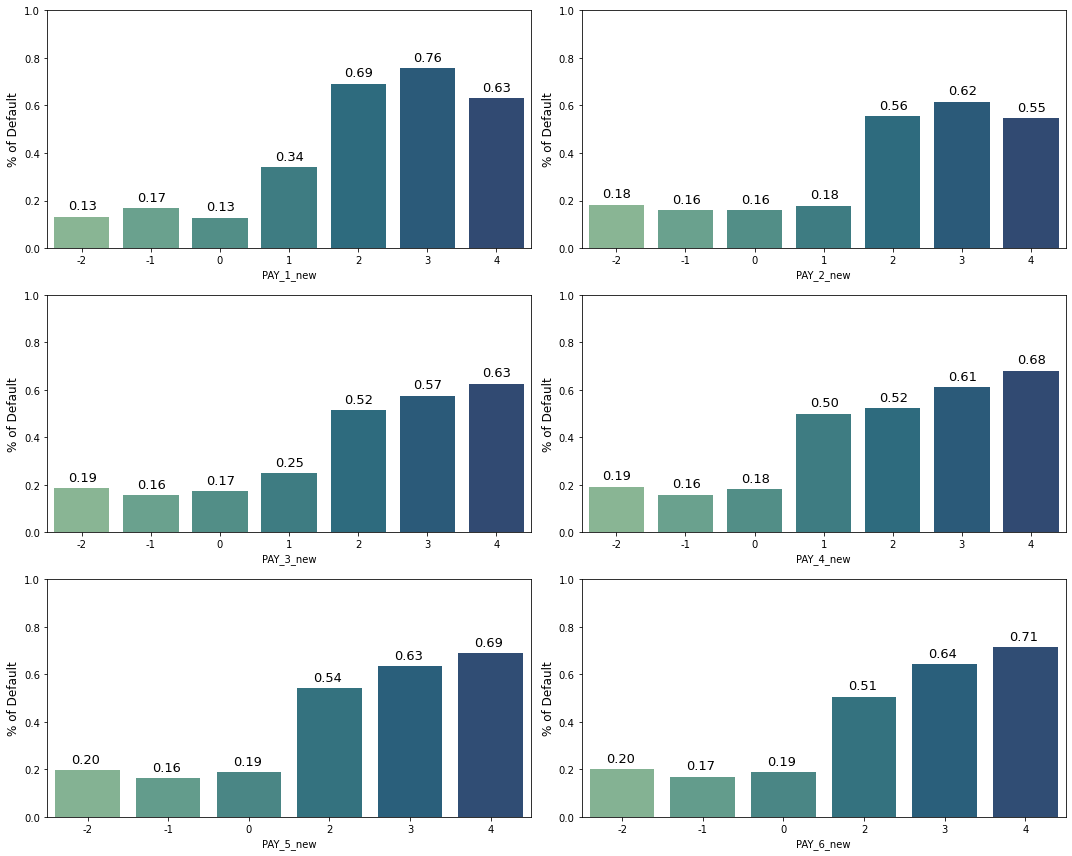

## <span id="33">Amount of Bill Statement and Previous Payment</span><a href="#Amount-of-Bill-Statement-and-Previous-Payment"
class="anchor-link">¶</a>

For the remaining features, we'll be following the same approach used to
analyse 'Age' and Limit_Bal', showing distribution and density plots
first, then dividing the data in bins to get a clear percentage of
default for each group.

## Amount of Bill Statement (BILL_AMTX)<a href="#Amount-of-Bill-Statement-(BILL_AMTX)"
class="anchor-link">¶</a>

In \[59\]:

    bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    plt.figure(figsize=(15,12))

    for i,col in enumerate(bill_amtx_fts):    
        plt.subplot(3,2,i + 1)
        sns.distplot(df.loc[:,col])
        plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
        plt.ylabel('')
        plt.tight_layout()

    plt.show()

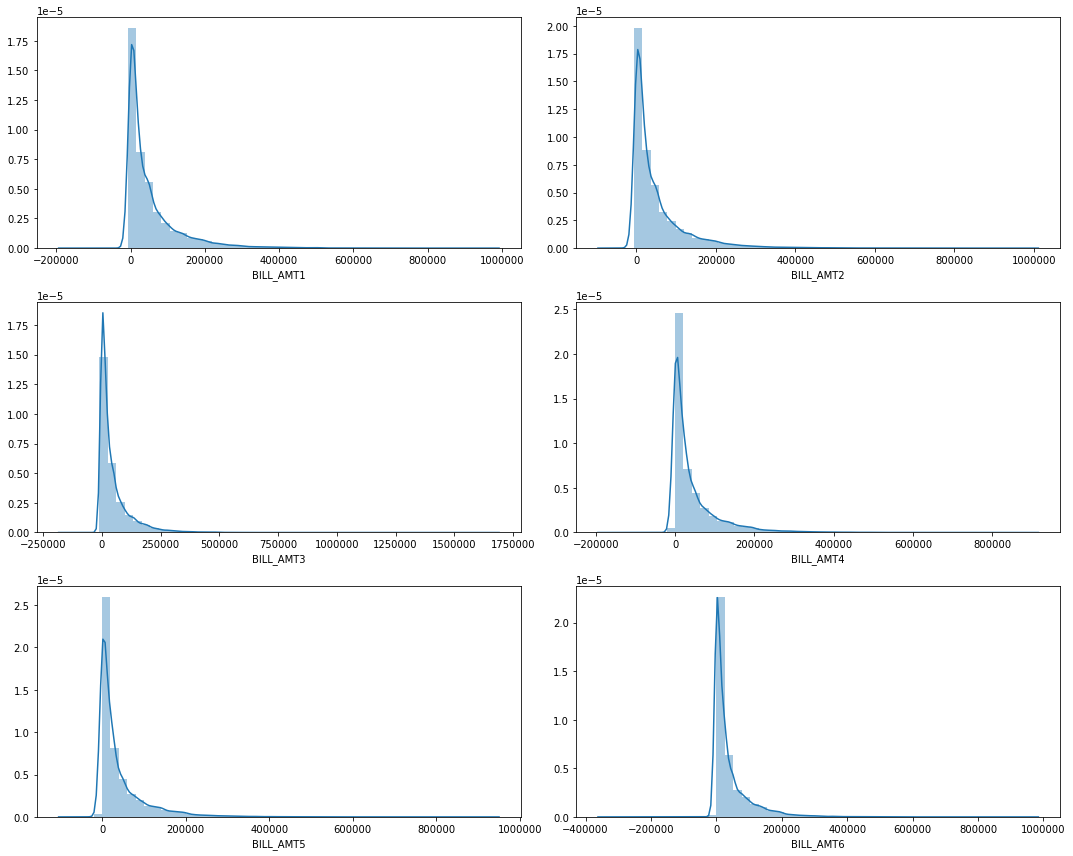

In \[60\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(bill_amtx_fts):    
        plt.subplot(3,2,i + 1)    
        sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
        sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
        plt.xlim(-50000,200000)
        plt.ylabel('')
        plt.legend()
        plt.tight_layout()

    plt.show()

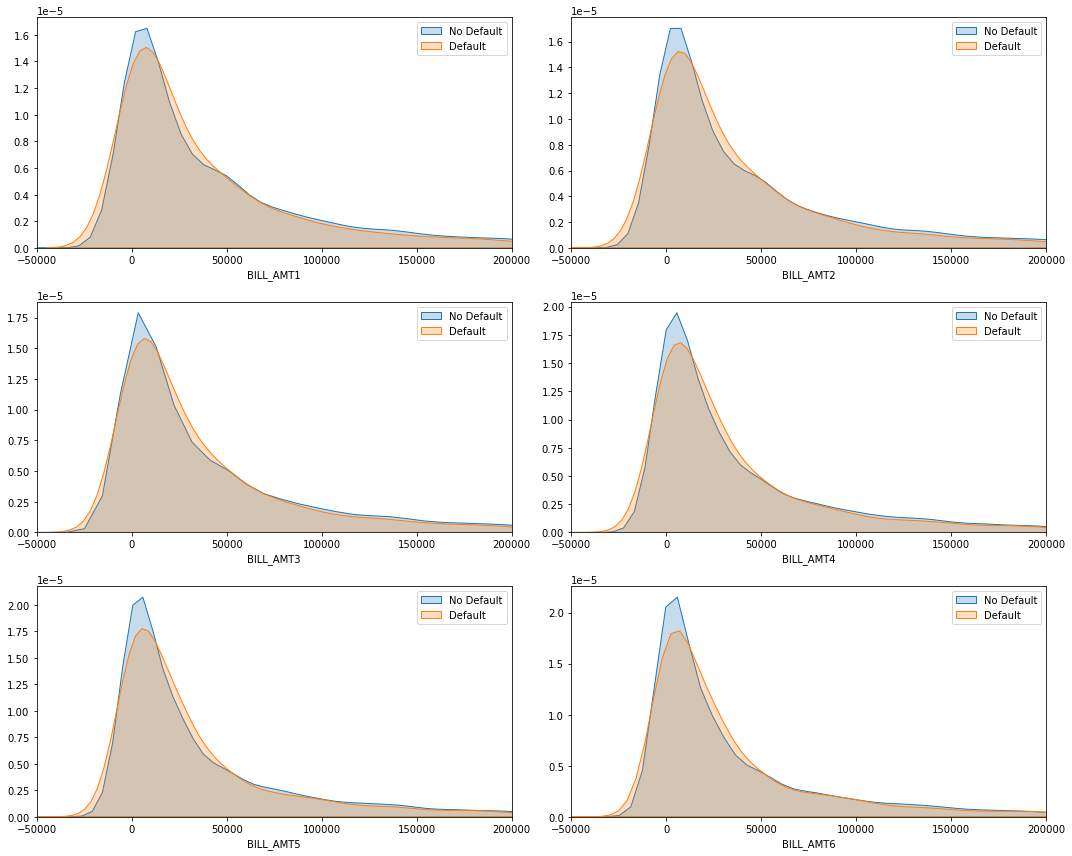

In \[61\]:

    df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
    df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
    df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
    df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
    df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
    df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In \[62\]:

    bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

    for i, col in enumerate (bill_amtx_bins):
        df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
        print(df[col].value_counts())

    (0, 25000]           12965
    (25000, 75000]        7656
    (75000, 200000]       5258
    (-1, 0]               2008
    (200000, 2000000]     1523
    (-350000, -1]          590
    Name: BILL_AMT1_bin, dtype: int64
    (0, 25000]           12647
    (25000, 75000]        7692
    (75000, 200000]       5094
    (-1, 0]               2506
    (200000, 2000000]     1392
    (-350000, -1]          669
    Name: BILL_AMT2_bin, dtype: int64
    (0, 25000]           12696
    (25000, 75000]        7635
    (75000, 200000]       4888
    (-1, 0]               2870
    (200000, 2000000]     1256
    (-350000, -1]          655
    Name: BILL_AMT3_bin, dtype: int64
    (0, 25000]           13081
    (25000, 75000]        7401
    (75000, 200000]       4623
    (-1, 0]               3195
    (200000, 2000000]     1025
    (-350000, -1]          675
    Name: BILL_AMT4_bin, dtype: int64
    (0, 25000]           13401
    (25000, 75000]        7163
    (75000, 200000]       4399
    (-1, 0]               3506
    (200000, 2000000]      876
    (-350000, -1]          655
    Name: BILL_AMT5_bin, dtype: int64
    (0, 25000]           13163
    (25000, 75000]        6986
    (75000, 200000]       4322
    (-1, 0]               4020
    (200000, 2000000]      821
    (-350000, -1]          688
    Name: BILL_AMT6_bin, dtype: int64

In \[63\]:

    for col in bill_amtx_bins:
        print(df['Default'].groupby(df[col]).value_counts(normalize = True))

    BILL_AMT1_bin      Default
    (-350000, -1]      0          0.815254
                       1          0.184746
    (-1, 0]            0          0.734064
                       1          0.265936
    (0, 25000]         0          0.774470
                       1          0.225530
    (25000, 75000]     0          0.775209
                       1          0.224791
    (75000, 200000]    0          0.802396
                       1          0.197604
    (200000, 2000000]  0          0.797111
                       1          0.202889
    Name: Default, dtype: float64
    BILL_AMT2_bin      Default
    (-350000, -1]      0          0.810164
                       1          0.189836
    (-1, 0]            0          0.753791
                       1          0.246209
    (0, 25000]         0          0.775836
                       1          0.224164
    (25000, 75000]     0          0.773531
                       1          0.226469
    (75000, 200000]    0          0.799176
                       1          0.200824
    (200000, 2000000]  0          0.790230
                       1          0.209770
    Name: Default, dtype: float64
    BILL_AMT3_bin      Default
    (-350000, -1]      0          0.803053
                       1          0.196947
    (-1, 0]            0          0.759582
                       1          0.240418
    (0, 25000]         0          0.778355
                       1          0.221645
    (25000, 75000]     0          0.768697
                       1          0.231303
    (75000, 200000]    0          0.801146
                       1          0.198854
    (200000, 2000000]  0          0.789013
                       1          0.210987
    Name: Default, dtype: float64
    BILL_AMT4_bin      Default
    (-350000, -1]      0          0.825185
                       1          0.174815
    (-1, 0]            0          0.755556
                       1          0.244444
    (0, 25000]         0          0.779069
                       1          0.220931
    (25000, 75000]     0          0.771517
                       1          0.228483
    (75000, 200000]    0          0.798616
                       1          0.201384
    (200000, 2000000]  0          0.780488
                       1          0.219512
    Name: Default, dtype: float64
    BILL_AMT5_bin      Default
    (-350000, -1]      0          0.801527
                       1          0.198473
    (-1, 0]            0          0.753280
                       1          0.246720
    (0, 25000]         0          0.781882
                       1          0.218118
    (25000, 75000]     0          0.771325
                       1          0.228675
    (75000, 200000]    0          0.799273
                       1          0.200727
    (200000, 2000000]  0          0.775114
                       1          0.224886
    Name: Default, dtype: float64
    BILL_AMT6_bin      Default
    (-350000, -1]      0          0.806686
                       1          0.193314
    (-1, 0]            0          0.762935
                       1          0.237065
    (0, 25000]         0          0.782496
                       1          0.217504
    (25000, 75000]     0          0.769539
                       1          0.230461
    (75000, 200000]    0          0.793614
                       1          0.206386
    (200000, 2000000]  0          0.774665
                       1          0.225335
    Name: Default, dtype: float64

In \[64\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(bill_amtx_bins):    
        plt.subplot(3,2,i + 1)
        ax = sns.countplot(data = df, x = col, hue="Default", palette = 'crest')
        plt.ylim(0,13000)
        plt.ylabel('')
        plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
        plt.tight_layout()

        for p in ax.patches:
            ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
            
    plt.show()

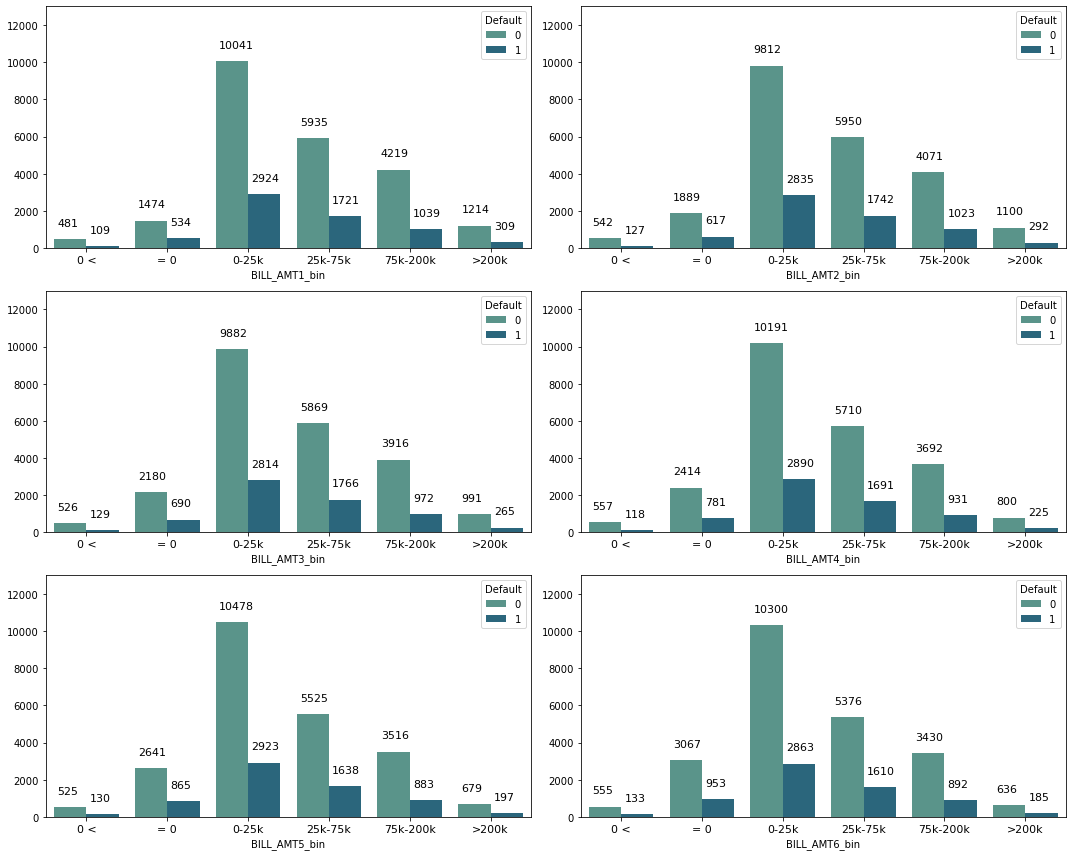

In \[65\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(bill_amtx_bins):    
        plt.subplot(3,2,i + 1)
        ax = sns.barplot(x = col, y = "Default", data = df, palette = 'crest', ci = None)
        plt.ylabel("% of Default", fontsize= 12)
        plt.ylim(0,0.5)
        plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

    plt.show()

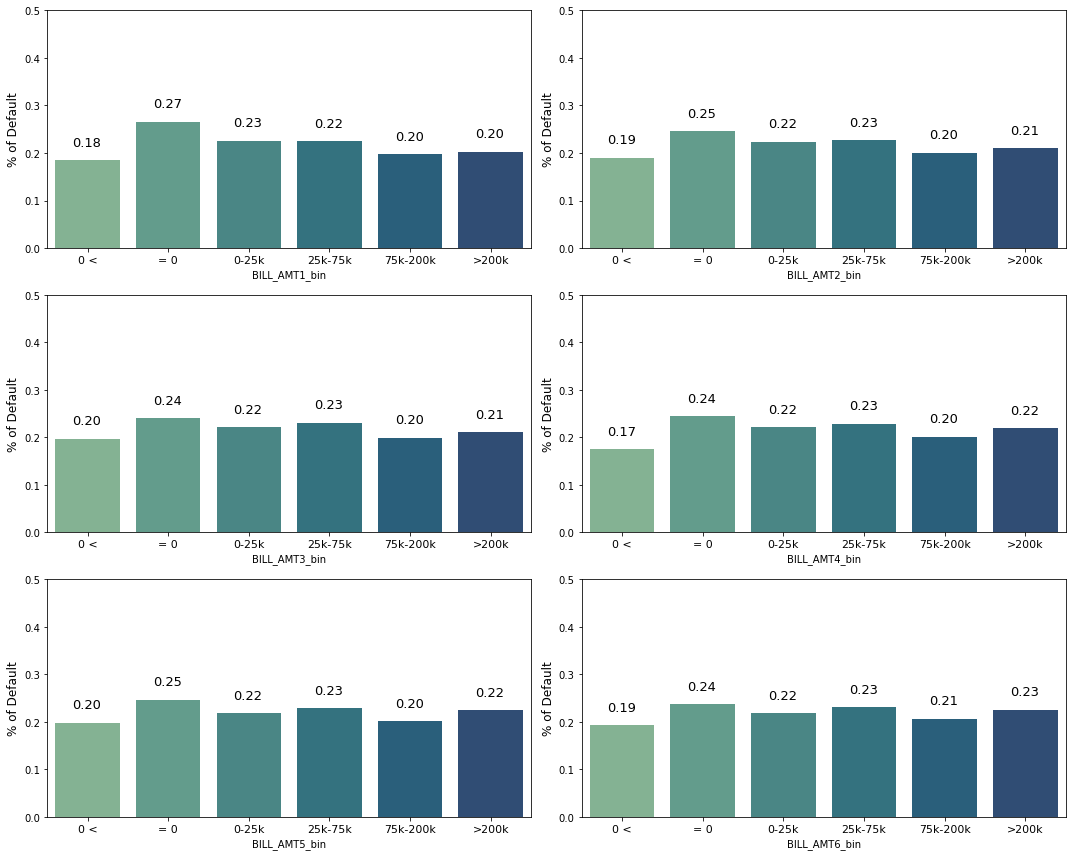

As expected, those who have a negative bill statement have a lower
chance of default than the rest. What stands out is that there is a
little higher chance of default for those who didn't have a bill in the
previous months.

## Amount of Previous Payment (PAY_AMTX)<a href="#Amount-of-Previous-Payment-(PAY_AMTX)"
class="anchor-link">¶</a>

In \[66\]:

    pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_amtx_fts):    
        plt.subplot(3,2,i + 1)
        sns.distplot(df.loc[:,col])
        plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
        plt.ylabel('')
        plt.tight_layout()

    plt.show()

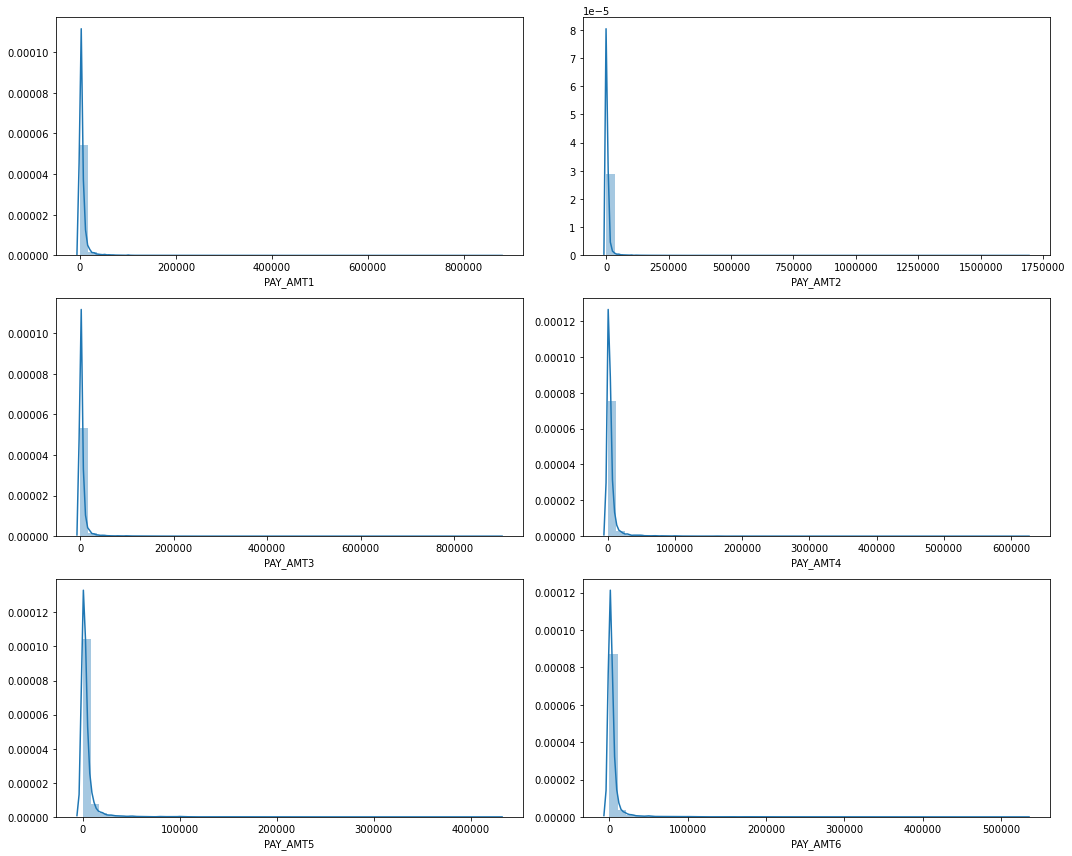

In \[67\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_amtx_fts):    
        plt.subplot(3,2,i + 1)    
        sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
        sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
        plt.xlim(0,100000)
        plt.ylabel('')
        plt.legend()
        plt.tight_layout()

    plt.show()

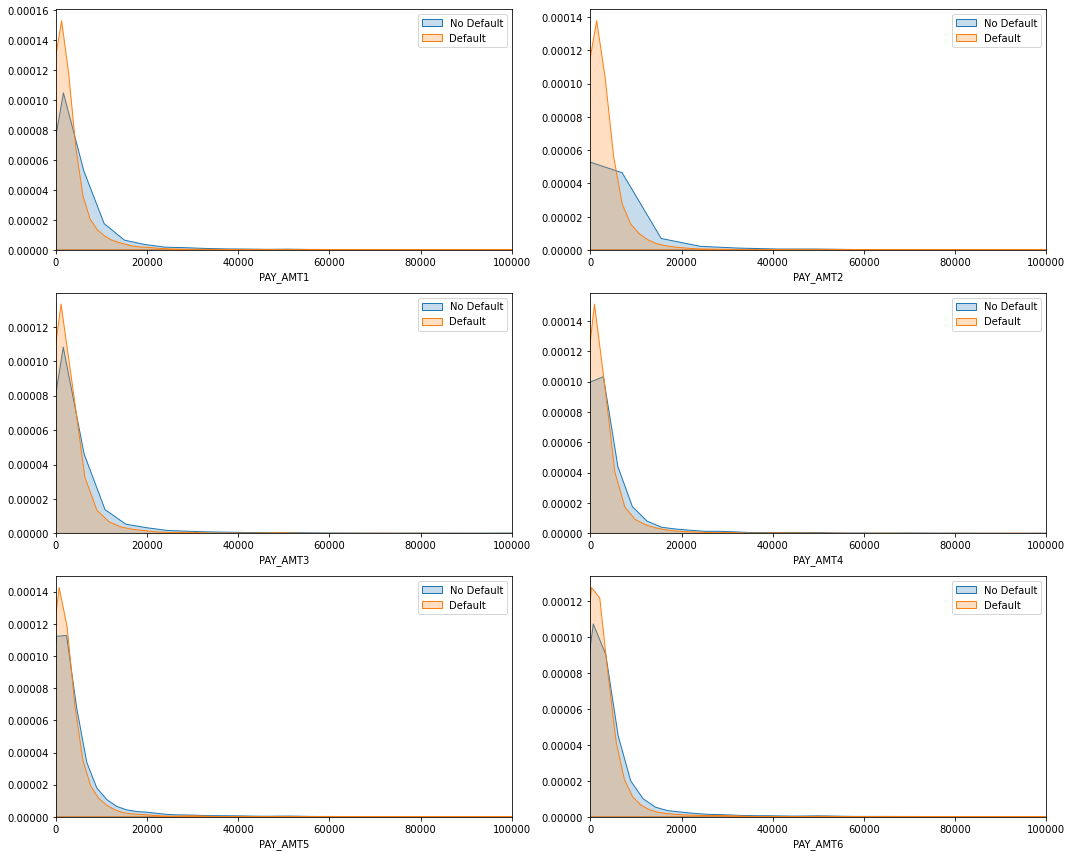

In \[68\]:

    df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
    df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
    df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
    df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
    df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
    df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In \[69\]:

    pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

    for i, col in enumerate (pay_amtx_bins):
        df[col] = pd.cut(df[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
        print(df[col].value_counts())

    (0, 25000]           23730
    (-1, 0]               5249
    (25000, 50000]         550
    (50000, 100000]        322
    (100000, 2000000]      149
    Name: PAY_AMT1_bin, dtype: int64
    (0, 25000]           23569
    (-1, 0]               5396
    (25000, 50000]         556
    (50000, 100000]        283
    (100000, 2000000]      196
    Name: PAY_AMT2_bin, dtype: int64
    (0, 25000]           23068
    (-1, 0]               5968
    (25000, 50000]         514
    (50000, 100000]        273
    (100000, 2000000]      177
    Name: PAY_AMT3_bin, dtype: int64
    (0, 25000]           22641
    (-1, 0]               6408
    (25000, 50000]         533
    (50000, 100000]        271
    (100000, 2000000]      147
    Name: PAY_AMT4_bin, dtype: int64
    (0, 25000]           22382
    (-1, 0]               6703
    (25000, 50000]         493
    (50000, 100000]        268
    (100000, 2000000]      154
    Name: PAY_AMT5_bin, dtype: int64
    (0, 25000]           21785
    (-1, 0]               7173
    (25000, 50000]         517
    (50000, 100000]        300
    (100000, 2000000]      225
    Name: PAY_AMT6_bin, dtype: int64

In \[70\]:

    for col in pay_amtx_bins:
        print(df['Default'].groupby(df[col]).value_counts(normalize = True))

    PAY_AMT1_bin       Default
    (-1, 0]            0          0.640503
                       1          0.359497
    (0, 25000]         0          0.803582
                       1          0.196418
    (25000, 50000]     0          0.910909
                       1          0.089091
    (50000, 100000]    0          0.919255
                       1          0.080745
    (100000, 2000000]  0          0.912752
                       1          0.087248
    Name: Default, dtype: float64
    PAY_AMT2_bin       Default
    (-1, 0]            0          0.666605
                       1          0.333395
    (0, 25000]         0          0.797997
                       1          0.202003
    (25000, 50000]     0          0.926259
                       1          0.073741
    (50000, 100000]    0          0.936396
                       1          0.063604
    (100000, 2000000]  0          0.913265
                       1          0.086735
    Name: Default, dtype: float64
    PAY_AMT3_bin       Default
    (-1, 0]            0          0.676441
                       1          0.323559
    (0, 25000]         0          0.800373
                       1          0.199627
    (25000, 50000]     0          0.889105
                       1          0.110895
    (50000, 100000]    0          0.926740
                       1          0.073260
    (100000, 2000000]  0          0.870056
                       1          0.129944
    Name: Default, dtype: float64
    PAY_AMT4_bin       Default
    (-1, 0]            0          0.688983
                       1          0.311017
    (0, 25000]         0          0.799479
                       1          0.200521
    (25000, 50000]     0          0.898687
                       1          0.101313
    (50000, 100000]    0          0.874539
                       1          0.125461
    (100000, 2000000]  0          0.897959
                       1          0.102041
    Name: Default, dtype: float64
    PAY_AMT5_bin       Default
    (-1, 0]            0          0.706102
                       1          0.293898
    (0, 25000]         0          0.796175
                       1          0.203825
    (25000, 50000]     0          0.882353
                       1          0.117647
    (50000, 100000]    0          0.902985
                       1          0.097015
    (100000, 2000000]  0          0.870130
                       1          0.129870
    Name: Default, dtype: float64
    PAY_AMT6_bin       Default
    (-1, 0]            0          0.710303
                       1          0.289697
    (0, 25000]         0          0.796649
                       1          0.203351
    (25000, 50000]     0          0.874275
                       1          0.125725
    (50000, 100000]    0          0.880000
                       1          0.120000
    (100000, 2000000]  0          0.880000
                       1          0.120000
    Name: Default, dtype: float64

In \[71\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_amtx_bins):    
        plt.subplot(3,2,i + 1)
        ax = sns.countplot(data = df, x = col, hue="Default", palette = 'crest')
        plt.ylim(0,23000)
        plt.ylabel('')
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

    plt.show()

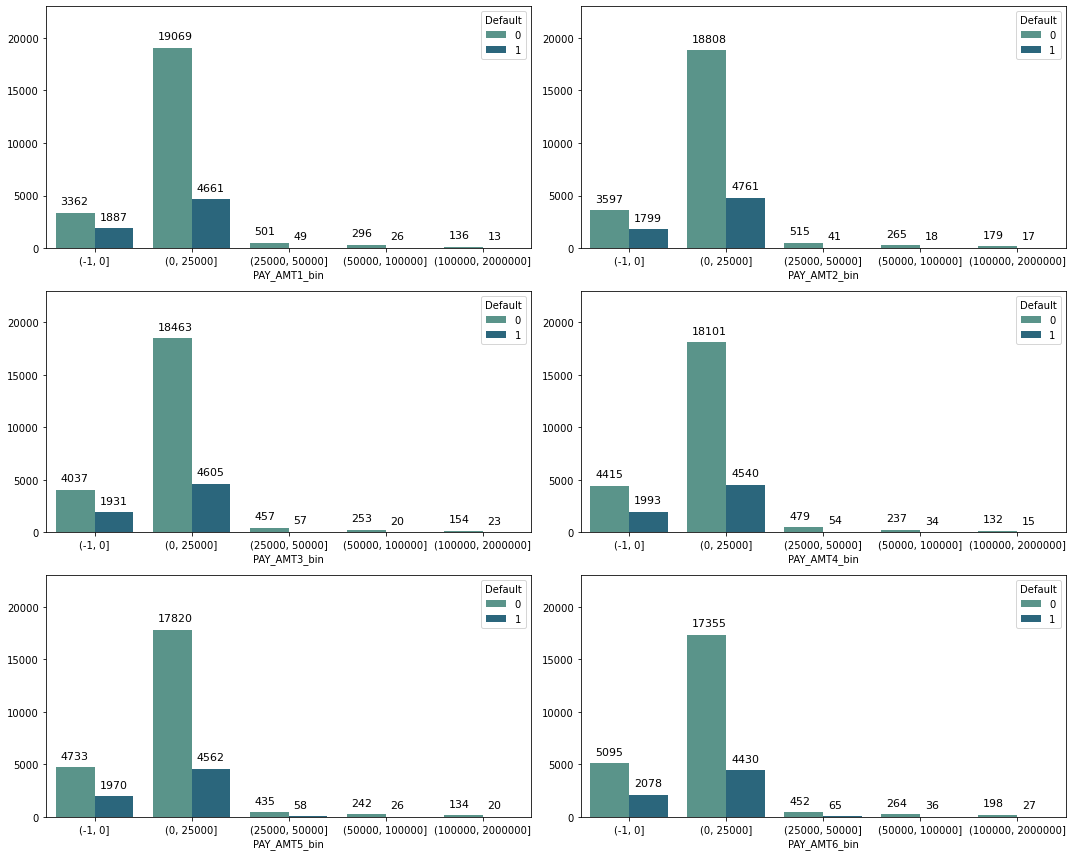

In \[72\]:

    plt.figure(figsize=(15,12))

    for i,col in enumerate(pay_amtx_bins):    
        plt.subplot(3,2,i + 1)
        ax = sns.barplot(x = col, y = "Default", data = df, palette = 'crest', ci = None)
        plt.ylabel("% of Default", fontsize= 12)
        plt.ylim(0,0.5)
        plt.tight_layout()
        
        for p in ax.patches:
            ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

    plt.show()

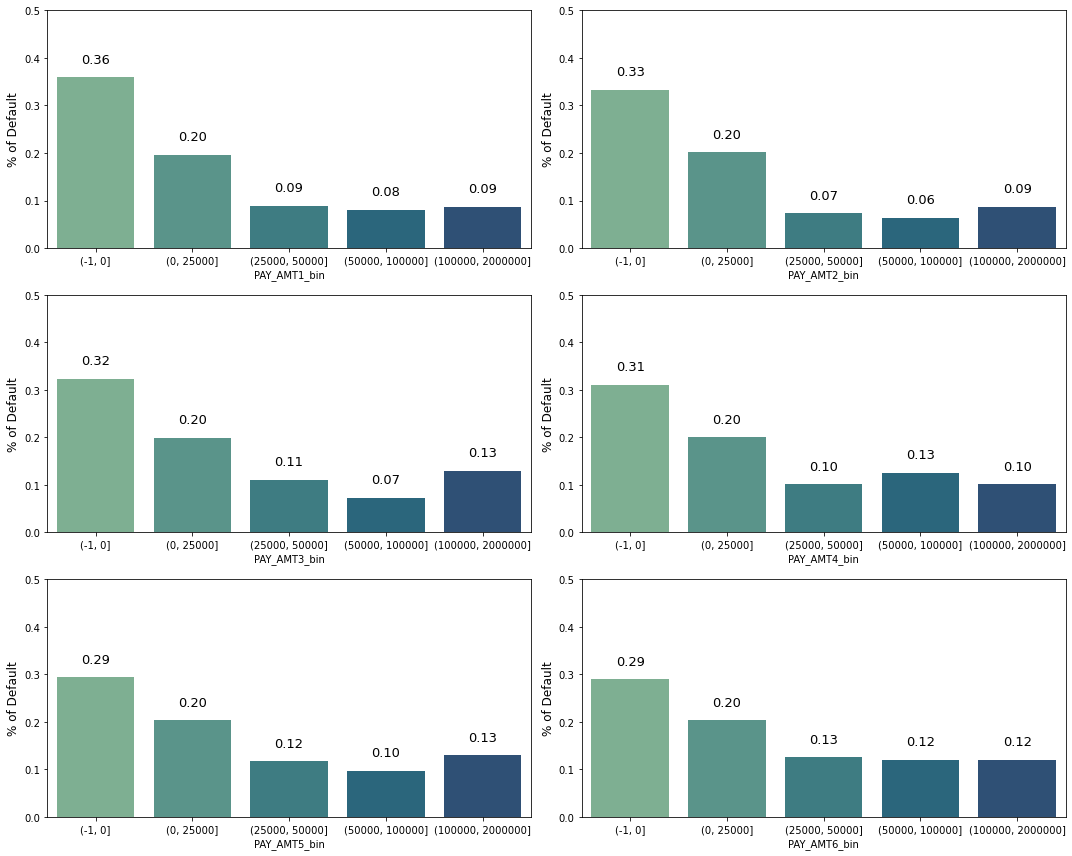

There are no surprises in this group of features. There is a higher
default rate among those who paid nothing in previous months and lower
rates among those paid over 25k of NT dollars.

# <span id="77">4. Data Engineering</span><a href="#4.-Data-Engineering" class="anchor-link">¶</a>

In \[73\]:

    columns_names = list(df.columns)

In \[74\]:

    # Checking which columns has nan
    lst = []
    for col_name in columns_names:
        if (df[col_name].isnull().values.any() == True):
            print("the column ", col_name ," has nan")
            print(df[col_name].isnull().sum())
            lst.append(col_name)

    the column  EDUCATION  has nan
    14
    the column  MARRIAGE  has nan
    54

We can see that we have a very tiny amount of rows with nan values at
these specific rows. We decide to ommit thoese rows because they are
only about \~0.003% of our data.

In \[75\]:

    df = df[df['EDUCATION'].notna()]
    df = df[df['MARRIAGE'].notna()]
    df = df[df['SEX'].notna()]

### Dealing with Missing values - conclusions<a href="#Dealing-with-Missing-values---conclusions"
class="anchor-link">¶</a>

We can see that we have a very tiny amount of rows with nan values at
these specific rows. We decide to ommit thoese rows because they are
only about \~0.003% of our data.

In \[76\]:

    # We can see that we omitted only a friction of the data
    df.shape

Out\[76\]:

    (29932, 44)

## Adding columns (1-HOT) & Features ( Feature engneering )<a href="#Adding-columns-(1-HOT)--&amp;-Features-(-Feature-engneering-)"
class="anchor-link">¶</a>

### One-Hot Encoding<a href="#One-Hot-Encoding" class="anchor-link">¶</a>

One-hot encoding is used to convert categorical variables into a format
that can be readily used by machine learning algorithms.

The basic idea of one-hot encoding is to create new variables that take
on values 0 and 1 to represent the original categorical values.

We have several features that has categorical values and that is why we
will use One-hot encoding

In \[77\]:

    df.dtypes

Out\[77\]:

    LIMIT_BAL           int64
    SEX                object
    EDUCATION          object
    MARRIAGE           object
    AGE                 int64
    PAY_1               int64
    PAY_2               int64
    PAY_3               int64
    PAY_4               int64
    PAY_5               int64
    PAY_6               int64
    BILL_AMT1           int64
    BILL_AMT2           int64
    BILL_AMT3           int64
    BILL_AMT4           int64
    BILL_AMT5           int64
    BILL_AMT6           int64
    PAY_AMT1            int64
    PAY_AMT2            int64
    PAY_AMT3            int64
    PAY_AMT4            int64
    PAY_AMT5            int64
    PAY_AMT6            int64
    Default             int64
    AgeBin             object
    LimitBin           object
    PAY_1_new           int64
    PAY_2_new           int64
    PAY_3_new           int64
    PAY_4_new           int64
    PAY_5_new           int64
    PAY_6_new           int64
    BILL_AMT1_bin    category
    BILL_AMT2_bin    category
    BILL_AMT3_bin    category
    BILL_AMT4_bin    category
    BILL_AMT5_bin    category
    BILL_AMT6_bin    category
    PAY_AMT1_bin     category
    PAY_AMT2_bin     category
    PAY_AMT3_bin     category
    PAY_AMT4_bin     category
    PAY_AMT5_bin     category
    PAY_AMT6_bin     category
    dtype: object

In \[78\]:

    df.head()

Out\[78\]:

|     | LIMIT_BAL | SEX    | EDUCATION  | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | ... | BILL_AMT3_bin   | BILL_AMT4_bin   | BILL_AMT5_bin   | BILL_AMT6_bin   | PAY_AMT1_bin | PAY_AMT2_bin    | PAY_AMT3_bin | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin |
|-----|-----------|--------|------------|----------|-----|-------|-------|-------|-------|-------|-----|-----------------|-----------------|-----------------|-----------------|--------------|-----------------|--------------|--------------|--------------|--------------|
| ID  |           |        |            |          |     |       |       |       |       |       |     |                 |                 |                 |                 |              |                 |              |              |              |              |
| 1   | 20000     | female | university | married  | 24  | 2     | 2     | -1    | -1    | -2    | ... | (0, 25000\]     | (-1, 0\]        | (-1, 0\]        | (-1, 0\]        | (-1, 0\]     | (0, 25000\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     |
| 2   | 120000    | female | university | single   | 26  | -1    | 2     | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]     | (0, 25000\]     | (-1, 0\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  |
| 3   | 90000     | female | university | single   | 34  | 0     | 0     | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  |
| 4   | 50000     | female | university | married  | 37  | 0     | 0     | 0     | 0     | 0     | ... | (25000, 75000\] | (25000, 75000\] | (25000, 75000\] | (25000, 75000\] | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  |
| 5   | 50000     | male   | university | married  | 57  | -1    | 0     | -1    | 0     | 0     | ... | (25000, 75000\] | (0, 25000\]     | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (25000, 50000\] | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  |

5 rows × 44 columns

#### Step 1: Perform One-Hot Encoding to 'SEX' feature<a href="#Step-1:-Perform-One-Hot-Encoding-to-&#39;SEX&#39;-feature"
class="anchor-link">¶</a>

In \[79\]:

    from sklearn.preprocessing import OneHotEncoder

    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding
    encoder_df = pd.DataFrame(encoder.fit_transform(df[['SEX']]).toarray())

    #merge one-hot encoded columns back with original DataFrame
    df = df.join(encoder_df)

    #view final df
    df.head()

Out\[79\]:

|     | LIMIT_BAL | SEX    | EDUCATION  | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | ... | BILL_AMT5_bin   | BILL_AMT6_bin   | PAY_AMT1_bin | PAY_AMT2_bin    | PAY_AMT3_bin | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin | 0   | 1   |
|-----|-----------|--------|------------|----------|-----|-------|-------|-------|-------|-------|-----|-----------------|-----------------|--------------|-----------------|--------------|--------------|--------------|--------------|-----|-----|
| ID  |           |        |            |          |     |       |       |       |       |       |     |                 |                 |              |                 |              |              |              |              |     |     |
| 1   | 20000     | female | university | married  | 24  | 2     | 2     | -1    | -1    | -2    | ... | (-1, 0\]        | (-1, 0\]        | (-1, 0\]     | (0, 25000\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | 1.0 | 0.0 |
| 2   | 120000    | female | university | single   | 26  | -1    | 2     | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (-1, 0\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  | 1.0 | 0.0 |
| 3   | 90000     | female | university | single   | 34  | 0     | 0     | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 1.0 | 0.0 |
| 4   | 50000     | female | university | married  | 37  | 0     | 0     | 0     | 0     | 0     | ... | (25000, 75000\] | (25000, 75000\] | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0 | 1.0 |
| 5   | 50000     | male   | university | married  | 57  | -1    | 0     | -1    | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (25000, 50000\] | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0 | 1.0 |

5 rows × 46 columns

#### Step 2: Drop the Original Categorical Variable<a href="#Step-2:-Drop-the-Original-Categorical-Variable"
class="anchor-link">¶</a>

In \[80\]:

    df.drop('SEX', axis=1, inplace=True)
    df.head()

Out\[80\]:

|     | LIMIT_BAL | EDUCATION  | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | ... | BILL_AMT5_bin   | BILL_AMT6_bin   | PAY_AMT1_bin | PAY_AMT2_bin    | PAY_AMT3_bin | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin | 0   | 1   |
|-----|-----------|------------|----------|-----|-------|-------|-------|-------|-------|-------|-----|-----------------|-----------------|--------------|-----------------|--------------|--------------|--------------|--------------|-----|-----|
| ID  |           |            |          |     |       |       |       |       |       |       |     |                 |                 |              |                 |              |              |              |              |     |     |
| 1   | 20000     | university | married  | 24  | 2     | 2     | -1    | -1    | -2    | -2    | ... | (-1, 0\]        | (-1, 0\]        | (-1, 0\]     | (0, 25000\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | 1.0 | 0.0 |
| 2   | 120000    | university | single   | 26  | -1    | 2     | 0     | 0     | 0     | 2     | ... | (0, 25000\]     | (0, 25000\]     | (-1, 0\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  | 1.0 | 0.0 |
| 3   | 90000     | university | single   | 34  | 0     | 0     | 0     | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 1.0 | 0.0 |
| 4   | 50000     | university | married  | 37  | 0     | 0     | 0     | 0     | 0     | 0     | ... | (25000, 75000\] | (25000, 75000\] | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0 | 1.0 |
| 5   | 50000     | university | married  | 57  | -1    | 0     | -1    | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (25000, 50000\] | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0 | 1.0 |

5 rows × 45 columns

In \[81\]:

    male = df.columns[-1]
    female = df.columns[-2]

In \[82\]:

    df.rename(columns={male: 'male'}, inplace= True) #changes from 1 to male 
    df.rename(columns={female: 'female'}, inplace= True) #changes from 0 to female 

In \[83\]:

    df.head() # sucess! :)

Out\[83\]:

|     | LIMIT_BAL | EDUCATION  | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | ... | BILL_AMT5_bin   | BILL_AMT6_bin   | PAY_AMT1_bin | PAY_AMT2_bin    | PAY_AMT3_bin | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin | female | male |
|-----|-----------|------------|----------|-----|-------|-------|-------|-------|-------|-------|-----|-----------------|-----------------|--------------|-----------------|--------------|--------------|--------------|--------------|--------|------|
| ID  |           |            |          |     |       |       |       |       |       |       |     |                 |                 |              |                 |              |              |              |              |        |      |
| 1   | 20000     | university | married  | 24  | 2     | 2     | -1    | -1    | -2    | -2    | ... | (-1, 0\]        | (-1, 0\]        | (-1, 0\]     | (0, 25000\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | 1.0    | 0.0  |
| 2   | 120000    | university | single   | 26  | -1    | 2     | 0     | 0     | 0     | 2     | ... | (0, 25000\]     | (0, 25000\]     | (-1, 0\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  | 1.0    | 0.0  |
| 3   | 90000     | university | single   | 34  | 0     | 0     | 0     | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 1.0    | 0.0  |
| 4   | 50000     | university | married  | 37  | 0     | 0     | 0     | 0     | 0     | 0     | ... | (25000, 75000\] | (25000, 75000\] | (0, 25000\]  | (0, 25000\]     | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  |
| 5   | 50000     | university | married  | 57  | -1    | 0     | -1    | 0     | 0     | 0     | ... | (0, 25000\]     | (0, 25000\]     | (0, 25000\]  | (25000, 50000\] | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  |

5 rows × 45 columns

#### Step 1: Perform One-Hot Encoding to 'EDUCATION' feature<a
href="#Step-1:-Perform-One-Hot-Encoding-to-&#39;EDUCATION&#39;-feature"
class="anchor-link">¶</a>

In \[84\]:

    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding  
    encoder_df = pd.DataFrame(encoder.fit_transform(df[['EDUCATION']]).toarray())

    #merge one-hot encoded columns back with original DataFrame
    df = df.join(encoder_df)

    #view final df
    df.head()

Out\[84\]:

|     | LIMIT_BAL | EDUCATION  | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | ... | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin | female | male | 0   | 1   | 2   | 3   | 4   |
|-----|-----------|------------|----------|-----|-------|-------|-------|-------|-------|-------|-----|--------------|--------------|--------------|--------|------|-----|-----|-----|-----|-----|
| ID  |           |            |          |     |       |       |       |       |       |       |     |              |              |              |        |      |     |     |     |     |     |
| 1   | 20000     | university | married  | 24  | 2     | 2     | -1    | -1    | -2    | -2    | ... | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | 1.0    | 0.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 2   | 120000    | university | single   | 26  | -1    | 2     | 0     | 0     | 0     | 2     | ... | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  | 1.0    | 0.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 3   | 90000     | university | single   | 34  | 0     | 0     | 0     | 0     | 0     | 0     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 1.0    | 0.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 4   | 50000     | university | married  | 37  | 0     | 0     | 0     | 0     | 0     | 0     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 5   | 50000     | university | married  | 57  | -1    | 0     | -1    | 0     | 0     | 0     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  | 1.0 | 0.0 | 0.0 | 0.0 | 0.0 |

5 rows × 50 columns

#### Step 2: Drop the Original Categorical Variable<a href="#Step-2:-Drop-the-Original-Categorical-Variable"
class="anchor-link">¶</a>

In \[85\]:

    df.drop('EDUCATION', axis=1, inplace=True)
    df.head()

Out\[85\]:

|     | LIMIT_BAL | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | BILL_AMT1 | ... | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin | female | male | 0   | 1   | 2   | 3   | 4   |
|-----|-----------|----------|-----|-------|-------|-------|-------|-------|-------|-----------|-----|--------------|--------------|--------------|--------|------|-----|-----|-----|-----|-----|
| ID  |           |          |     |       |       |       |       |       |       |           |     |              |              |              |        |      |     |     |     |     |     |
| 1   | 20000     | married  | 24  | 2     | 2     | -1    | -1    | -2    | -2    | 3913      | ... | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | 1.0    | 0.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 2   | 120000    | single   | 26  | -1    | 2     | 0     | 0     | 0     | 2     | 2682      | ... | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  | 1.0    | 0.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 3   | 90000     | single   | 34  | 0     | 0     | 0     | 0     | 0     | 0     | 29239     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 1.0    | 0.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 4   | 50000     | married  | 37  | 0     | 0     | 0     | 0     | 0     | 0     | 46990     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |
| 5   | 50000     | married  | 57  | -1    | 0     | -1    | 0     | 0     | 0     | 8617      | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  | 1.0 | 0.0 | 0.0 | 0.0 | 0.0 |

5 rows × 49 columns

In \[86\]:

    others = df.columns[-5]
    graduate_school = df.columns[-4]
    high_school = df.columns[-3]
    university = df.columns[-2] # others
    unknown = df.columns[-1]
    ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    df.rename(columns={university: 'Education - University'}, inplace= True) 
    df.rename(columns={graduate_school: 'Education - Graduate school'}, inplace= True) 
    df.rename(columns={high_school: 'Education - High School'}, inplace= True)
    df.rename(columns={others: 'Education - Others'}, inplace= True) 
    df.rename(columns={unknown: 'Education - Unknown'}, inplace= True) 

In \[87\]:

    df.head()

Out\[87\]:

|     | LIMIT_BAL | MARRIAGE | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | BILL_AMT1 | ... | PAY_AMT4_bin | PAY_AMT5_bin | PAY_AMT6_bin | female | male | Education - Others | Education - Graduate school | Education - High School | Education - University | Education - Unknown |
|-----|-----------|----------|-----|-------|-------|-------|-------|-------|-------|-----------|-----|--------------|--------------|--------------|--------|------|--------------------|-----------------------------|-------------------------|------------------------|---------------------|
| ID  |           |          |     |       |       |       |       |       |       |           |     |              |              |              |        |      |                    |                             |                         |                        |                     |
| 1   | 20000     | married  | 24  | 2     | 2     | -1    | -1    | -2    | -2    | 3913      | ... | (-1, 0\]     | (-1, 0\]     | (-1, 0\]     | 1.0    | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 |
| 2   | 120000    | single   | 26  | -1    | 2     | 0     | 0     | 0     | 2     | 2682      | ... | (0, 25000\]  | (-1, 0\]     | (0, 25000\]  | 1.0    | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 |
| 3   | 90000     | single   | 34  | 0     | 0     | 0     | 0     | 0     | 0     | 29239     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 1.0    | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 |
| 4   | 50000     | married  | 37  | 0     | 0     | 0     | 0     | 0     | 0     | 46990     | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 |
| 5   | 50000     | married  | 57  | -1    | 0     | -1    | 0     | 0     | 0     | 8617      | ... | (0, 25000\]  | (0, 25000\]  | (0, 25000\]  | 0.0    | 1.0  | 1.0                | 0.0                         | 0.0                     | 0.0                    | 0.0                 |

5 rows × 49 columns

#### Step 1: Perform One-Hot Encoding to 'MARRIAGE' feature<a
href="#Step-1:-Perform-One-Hot-Encoding-to-&#39;MARRIAGE&#39;-feature"
class="anchor-link">¶</a>

In \[88\]:

    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(df[['MARRIAGE']]).toarray())

    #merge one-hot encoded columns back with original DataFrame
    df = df.join(encoder_df)

#### Step 2: Drop the Original Categorical Variable<a href="#Step-2:-Drop-the-Original-Categorical-Variable"
class="anchor-link">¶</a>

In \[89\]:

    df.drop('MARRIAGE', axis=1, inplace=True)
    df.head()

Out\[89\]:

|     | LIMIT_BAL | AGE | PAY_1 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | BILL_AMT1 | BILL_AMT2 | ... | female | male | Education - Others | Education - Graduate school | Education - High School | Education - University | Education - Unknown | 0   | 1   | 2   |
|-----|-----------|-----|-------|-------|-------|-------|-------|-------|-----------|-----------|-----|--------|------|--------------------|-----------------------------|-------------------------|------------------------|---------------------|-----|-----|-----|
| ID  |           |     |       |       |       |       |       |       |           |           |     |        |      |                    |                             |                         |                        |                     |     |     |     |
| 1   | 20000     | 24  | 2     | 2     | -1    | -1    | -2    | -2    | 3913      | 3102      | ... | 1.0    | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 0.0 | 0.0 | 1.0 |
| 2   | 120000    | 26  | -1    | 2     | 0     | 0     | 0     | 2     | 2682      | 1725      | ... | 1.0    | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 0.0 | 0.0 | 1.0 |
| 3   | 90000     | 34  | 0     | 0     | 0     | 0     | 0     | 0     | 29239     | 14027     | ... | 1.0    | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 1.0 | 0.0 | 0.0 |
| 4   | 50000     | 37  | 0     | 0     | 0     | 0     | 0     | 0     | 46990     | 48233     | ... | 0.0    | 1.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 1.0 | 0.0 | 0.0 |
| 5   | 50000     | 57  | -1    | 0     | -1    | 0     | 0     | 0     | 8617      | 5670      | ... | 0.0    | 1.0  | 1.0                | 0.0                         | 0.0                     | 0.0                    | 0.0                 | 0.0 | 0.0 | 1.0 |

5 rows × 51 columns

In \[90\]:

    married = df.columns[-3]
    single = df.columns[-2]
    others = df.columns[-1]
    ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    df.rename(columns={married: 'Married'}, inplace= True) 
    df.rename(columns={single: 'Single'}, inplace= True) 
    df.rename(columns={others: 'relationship - Other'}, inplace= True) 

In \[91\]:

    # We have these columns already after we changed them a bit before. Let's delete the old ones.
    df = df.drop(labels = ["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"], axis = 1)

In \[92\]:

    # rename the new columns of delays
    df.rename(columns = {'PAY_1_new':'PAY_1', 'PAY_2_new':'PAY_2','PAY_3_new':'PAY_3','PAY_4_new':'PAY_4','PAY_5_new':'PAY_5','PAY_6_new':'PAY_6'}, inplace = True)

### Adding a feature - Data engneering<a href="#Adding-a-feature---Data-engneering" class="anchor-link">¶</a>

Here we will combine the total delyas in payments of all the last six
months and combine the value into a new columns. We do that based on the
assumption that a delay in one month can give as only part of the full
picture regarding the probability of being defaulted, but a group of six
months can give us better understanding

In \[93\]:

    df["sum_of_delays_in_payments"] = df['PAY_1'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] +df['PAY_6']

After creating another coulmn for age grous in the EDA process, now we
will make it our new age column and omit the age column.

In \[94\]:

    #df["AgeBin"].unique()
    df["AgeBin"].replace({"(20, 25]": "1", "(25, 30]": "2","(30, 35]":"3","(35, 40]":"5","(40, 50]":"6","(50, 60]":"7","(60, 80]":"8"}, inplace=True)
    df["AgeBin"] = pd.to_numeric(df["AgeBin"])

After creating another coulmn for age grous in the EDA process, now we
will make it our new LimitBin column and omit the LIMIT_BAL column.

In \[95\]:

    df["LimitBin"].unique()
    df["LimitBin"].replace({"(5000, 50000]": "1", "(50000, 100000]": "2","(100000, 150000]":"3","(150000, 200000]":"5","(200000, 300000]":"6","(300000, 400000]":"7","(400000, 500000]":"8","(500000, 1100000]":"9"}, inplace=True)
    df["LimitBin"] = pd.to_numeric(df["LimitBin"])

In \[96\]:

    # We no longer need the Limit_Bal column we started with
    df = df.drop(labels = ["LIMIT_BAL","AGE"], axis = 1)

In \[97\]:

    df.dtypes

Out\[97\]:

    BILL_AMT1                         int64
    BILL_AMT2                         int64
    BILL_AMT3                         int64
    BILL_AMT4                         int64
    BILL_AMT5                         int64
    BILL_AMT6                         int64
    PAY_AMT1                          int64
    PAY_AMT2                          int64
    PAY_AMT3                          int64
    PAY_AMT4                          int64
    PAY_AMT5                          int64
    PAY_AMT6                          int64
    Default                           int64
    AgeBin                            int64
    LimitBin                          int64
    PAY_1                             int64
    PAY_2                             int64
    PAY_3                             int64
    PAY_4                             int64
    PAY_5                             int64
    PAY_6                             int64
    BILL_AMT1_bin                  category
    BILL_AMT2_bin                  category
    BILL_AMT3_bin                  category
    BILL_AMT4_bin                  category
    BILL_AMT5_bin                  category
    BILL_AMT6_bin                  category
    PAY_AMT1_bin                   category
    PAY_AMT2_bin                   category
    PAY_AMT3_bin                   category
    PAY_AMT4_bin                   category
    PAY_AMT5_bin                   category
    PAY_AMT6_bin                   category
    female                          float64
    male                            float64
    Education - Others              float64
    Education - Graduate school     float64
    Education - High School         float64
    Education - University          float64
    Education - Unknown             float64
    Married                         float64
    Single                          float64
    relationship - Other            float64
    sum_of_delays_in_payments         int64
    dtype: object

Now, We Have the following features still as 'category' type. let's
remove them. We only needed them for the EDA.

In \[98\]:

    df = df.drop(labels = ["BILL_AMT1_bin","BILL_AMT2_bin","BILL_AMT3_bin","BILL_AMT4_bin","BILL_AMT5_bin","BILL_AMT6_bin"], axis = 1)
    df = df.drop(labels = ["PAY_AMT1_bin","PAY_AMT2_bin","PAY_AMT3_bin","PAY_AMT4_bin","PAY_AMT5_bin","PAY_AMT6_bin",], axis = 1)

### Splitting the Data and checking correlation to target the variable<a
href="#Splitting-the-Data-and-checking-correlation-to-target-the-variable"
class="anchor-link">¶</a>

First we will split our data, then check all the models we have
imported.

In \[99\]:

    df = df[df['female'].notna()]
    df = df[df['male'].notna()]
    df = df[df['Education - Others'].notna()]
    df = df[df['Education - Graduate school'].notna()]
    df = df[df['Education - High School'].notna()]
    df = df[df['Education - University'].notna()]
    df = df[df['Education - Unknown'].notna()]
    df = df[df['Married'].notna()]

    df = df[df['Single'].notna()]

    df = df[df['relationship - Other'].notna()]
    df.head()

Out\[99\]:

|     | BILL_AMT1 | BILL_AMT2 | BILL_AMT3 | BILL_AMT4 | BILL_AMT5 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | ... | male | Education - Others | Education - Graduate school | Education - High School | Education - University | Education - Unknown | Married | Single | relationship - Other | sum_of_delays_in_payments |
|-----|-----------|-----------|-----------|-----------|-----------|-----------|----------|----------|----------|----------|-----|------|--------------------|-----------------------------|-------------------------|------------------------|---------------------|---------|--------|----------------------|---------------------------|
| ID  |           |           |           |           |           |           |          |          |          |          |     |      |                    |                             |                         |                        |                     |         |        |                      |                           |
| 1   | 3913      | 3102      | 689       | 0         | 0         | 0         | 0        | 689      | 0        | 0        | ... | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 0.0     | 0.0    | 1.0                  | -2                        |
| 2   | 2682      | 1725      | 2682      | 3272      | 3455      | 3261      | 0        | 1000     | 1000     | 1000     | ... | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 0.0     | 0.0    | 1.0                  | 3                         |
| 3   | 29239     | 14027     | 13559     | 14331     | 14948     | 15549     | 1518     | 1500     | 1000     | 1000     | ... | 0.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 1.0     | 0.0    | 0.0                  | 0                         |
| 4   | 46990     | 48233     | 49291     | 28314     | 28959     | 29547     | 2000     | 2019     | 1200     | 1100     | ... | 1.0  | 0.0                | 0.0                         | 0.0                     | 1.0                    | 0.0                 | 1.0     | 0.0    | 0.0                  | 0                         |
| 5   | 8617      | 5670      | 35835     | 20940     | 19146     | 19131     | 2000     | 36681    | 10000    | 9000     | ... | 1.0  | 1.0                | 0.0                         | 0.0                     | 0.0                    | 0.0                 | 0.0     | 0.0    | 1.0                  | -2                        |

5 rows × 32 columns

In \[100\]:

    X = df.copy().drop('Default', axis = 1)
    Y = df['Default']

Now we will split the data into train and test sets.

### Splitting to Train & Test datasets<a href="#Splitting-to-Train-&amp;-Test-datasets"
class="anchor-link">¶</a>

In \[101\]:

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Checking correlation to target variable - Only train dataset<a href="#Checking-correlation-to-target-variable---Only-train-dataset"
class="anchor-link">¶</a>

Now, After we created several fetures using feature engineering, and
reviewd thier' correaltion to the target variable, let's plot the table.
Note: We are only using the train dataset for the correlation table so
we are playing by the rules :)

In \[102\]:

    # Creating a copy of the train dataframe
    X_df_only_for_correaltion_table = X_train.copy()

    #Adding this specific dataset the traget values
    X_df_only_for_correaltion_table["Default"] = Y_train

In \[103\]:

    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_theme(style="white")

    # Generate a large random dataset
    rs = np.random.RandomState(33)
    d = X_df_only_for_correaltion_table.copy()

    # Compute the correlation matrix
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

Out\[103\]:

    <AxesSubplot:>

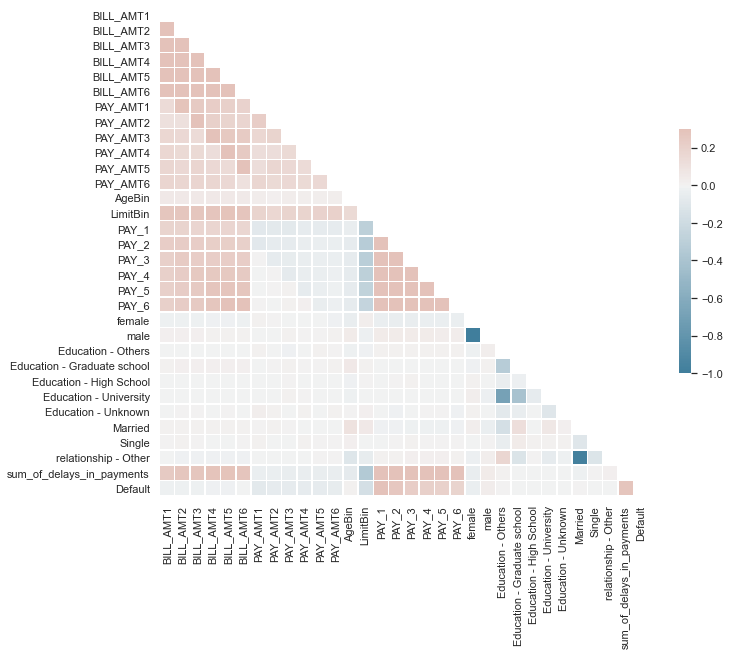

In \[104\]:

    corr_matrix=df.corr()
    corr_matrix["Default"].sort_values(ascending=False)

Out\[104\]:

    Default                        1.000000
    PAY_1                          0.327709
    sum_of_delays_in_payments      0.281933
    PAY_2                          0.264339
    PAY_3                          0.234525
    PAY_4                          0.215182
    PAY_5                          0.202007
    PAY_6                          0.184049
    male                           0.028966
    AgeBin                         0.010715
    Education - University         0.001330
    relationship - Other           0.000937
    Education - Others             0.000303
    Married                        0.000287
    Education - Unknown           -0.001298
    Education - Graduate school   -0.001549
    Education - High School       -0.001579
    BILL_AMT6                     -0.005580
    Single                        -0.005901
    BILL_AMT5                     -0.007006
    BILL_AMT4                     -0.010308
    BILL_AMT3                     -0.014360
    BILL_AMT2                     -0.014560
    BILL_AMT1                     -0.019969
    female                        -0.028966
    PAY_AMT6                      -0.053216
    PAY_AMT5                      -0.055256
    PAY_AMT3                      -0.056318
    PAY_AMT4                      -0.056871
    PAY_AMT2                      -0.058378
    PAY_AMT1                      -0.073415
    LimitBin                      -0.159777
    Name: Default, dtype: float64

It looks life the features "PAY_1" and the feature
"sum_of_delays_in_payments" we created ;) has high correaltion.

Because the feature "sum_of_delays_in_payments" we created using feature
engineering uses "PAY_1" but does not have better correlation to the
target variable, we will think about omit this feature later on. For now
we decided to keep it.

In \[ \]:

     

Now, We will scale to data so some features with other range of sacle
wouldn't impact our model more than others. We will use standart scaler.
It is important to note, that we scale each dataset ( Train,and test )
seperatly so we won't overfit the data. We did this because we are good
Machine learning students who listned carefully to our teacher the
entire semester :)!

Please note: We used other methods of scaling as well ( other than mix
max ) but they were worst so we omitted them

In \[105\]:

    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()

    columns_names = X_train.columns
    X_train[columns_names] = scaler.fit_transform(X_train[columns_names])
    X_test[columns_names] = scaler.fit_transform(X_test[columns_names])

# <span id="77">5. Algorithm performance</span><a href="#5.-Algorithm-performance" class="anchor-link">¶</a>

### 5.a Create a baseline using a dummy classifier<a href="#5.a-Create-a-baseline-using-a-dummy-classifier"
class="anchor-link">¶</a>

In \[197\]:

    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    import numpy as np
    from sklearn.dummy import DummyClassifier
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train, Y_train)
    DummyClassifier(strategy='most_frequent')

    ### Predict on the cross validation dataset 
    preidction_dummy_cross_val = dummy_clf.predict(X_train)


    Y_train_ser = Y_train.to_numpy()
    preidction_dummy_cross_val_ser = np.asarray(preidction_dummy_cross_val)

In \[200\]:

    report = metrics.classification_report(Y_train, preidction_dummy_cross_val,output_dict=True)
    cm = confusion_matrix(Y_train, preidction_dummy_cross_val)

In \[201\]:

    report

Out\[201\]:

    {'0': {'precision': 0.7784847216408539,
      'recall': 1.0,
      'f1-score': 0.8754471850875541,
      'support': 18598},
     '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5292},
     'accuracy': 0.7784847216408539,
     'macro avg': {'precision': 0.38924236082042696,
      'recall': 0.5,
      'f1-score': 0.4377235925437771,
      'support': 23890},
     'weighted avg': {'precision': 0.6060384618282377,
      'recall': 0.7784847216408539,
      'f1-score': 0.6815222581941537,
      'support': 23890}}

In \[202\]:

    cm

Out\[202\]:

    array([[18598,     0],
           [ 5292,     0]], dtype=int64)

As we can see, our basline model has accuracy = 0.77%. we will reference
it's recall and precision as guidline to evaluate the model we are going
to choose as baseline.

## 5.a baseline performance analysis<a href="#5.a-baseline-performance-analysis" class="anchor-link">¶</a>

As we have seen in the EDA, the distribtuion of the Target variable is
77% not default, and 23% default, so it does make sense that our model
has 77% accuracy. We will go back and use this model when we evaluate
our final ML model performance.

# 5.b creating ML Algorithms<a href="#5.b-creating-ML-Algorithms" class="anchor-link">¶</a>

## <span id="411">Naive Bayes</span><a href="#Naive-Bayes" class="anchor-link">¶</a>

In \[108\]:

    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()

    model.fit(X_train, Y_train)

Out\[108\]:

    GaussianNB()

In \[109\]:

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import recall_score
    from sklearn.metrics import auc
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score
    import statistics

    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)


    # Now we have our cross validation recall and precision, and we can calculate our f_beta
    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average accuracy is: ", statistics.mean(cross_validate_accuracy_score))

    After using K=10, Our Average F_beta is:  0.6694404616974438
    After using K=10, Our Average recall is:  0.6816988297436885
    After using K=10, Our Average accuracy is:  0.7173294265383006

In \[110\]:

    pred_proba = model.predict_proba(X_train)[:,1]

    roc_auc = metrics.roc_auc_score(Y_train, pred_proba)
    print('ROC_AUC: ', roc_auc)

    fpr, tpr, thresholds = metrics.roc_curve(Y_train, pred_proba)
    plt.plot(fpr,tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

    plt.show()

    ROC_AUC:  0.7285260386909181

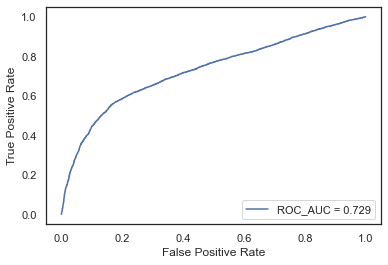

## <span id="412">LDA - Linear Discriminant Analysis</span><a href="#LDA---Linear-Discriminant-Analysis" class="anchor-link">¶</a>

In \[111\]:

    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    model = LinearDiscriminantAnalysis()

    model.fit(X_train, Y_train)

Out\[111\]:

    LinearDiscriminantAnalysis()

In \[112\]:

    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)


    # Now we have our cross validation recall and precision, and we can calculate our f_beta
    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average accuracy is: ", statistics.mean(cross_validate_accuracy_score))

    After using K=10, Our Average F_beta is:  0.660712592714405
    After using K=10, Our Average recall is:  0.6230551727790857
    After using K=10, Our Average accuracy is:  0.8143156132272917

In \[113\]:

    pred_proba = model.predict_proba(X_train)[:,1]

    roc_auc = metrics.roc_auc_score(Y_train, pred_proba)
    print('ROC_AUC: ', roc_auc)

    fpr, tpr, thresholds = metrics.roc_curve(Y_train, pred_proba)
    plt.plot(fpr,tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

    plt.show()

    ROC_AUC:  0.7182902970247615

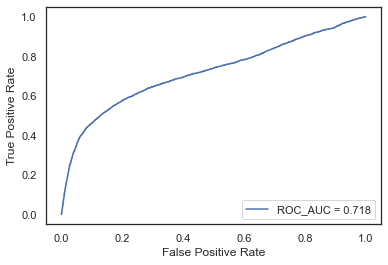

## <span id="414">Logistic regression classifier</span> <a href="#Logistic-regression-classifier-" class="anchor-link">¶</a>

In \[114\]:

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=0)

    model.fit(X_train, Y_train)

Out\[114\]:

    LogisticRegression(random_state=0)

In \[115\]:

    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)


    # Now we have our cross validation recall and precision, and we can calculate our f_beta
    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average accuracy is: ", statistics.mean(cross_validate_accuracy_score))

    After using K=10, Our Average F_beta is:  0.651989419167817
    After using K=10, Our Average recall is:  0.6104237166609677
    After using K=10, Our Average accuracy is:  0.8120133947258267

In \[116\]:

    pred_proba = model.predict_proba(X_train)[:,1]

    roc_auc = metrics.roc_auc_score(Y_train, pred_proba)
    print('ROC_AUC: ', roc_auc)

    fpr, tpr, thresholds = metrics.roc_curve(Y_train, pred_proba)
    plt.plot(fpr,tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

    plt.show()

    ROC_AUC:  0.7204045695060474

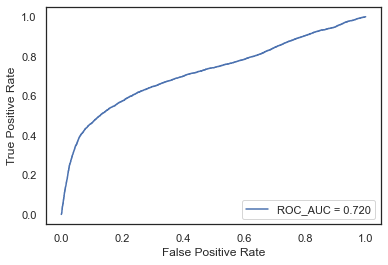

In \[117\]:

    cross_validate_recall_score

Out\[117\]:

    array([0.60323241, 0.60905086, 0.61847674, 0.61738419, 0.60485395,
           0.60820121, 0.61187776, 0.59741397, 0.6233403 , 0.61040578])

## <span id="415">Gradient Boosting Classifier</span> <a href="#Gradient-Boosting-Classifier-" class="anchor-link">¶</a>

In \[118\]:

    from sklearn.model_selection import cross_val_score
    from sklearn.datasets import load_iris
    from sklearn.ensemble import AdaBoostClassifier

    from sklearn.datasets import make_hastie_10_2
    from sklearn.ensemble import GradientBoostingClassifier

    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0)



    model.fit(X_train, Y_train)

Out\[118\]:

    GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In \[119\]:

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import recall_score
    from sklearn.metrics import auc
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score
    import statistics

    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)


    # Now we have our cross validation recall and precision, and we can calculate our f_beta
    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average accuracy is: ", statistics.mean(cross_validate_accuracy_score))

    After using K=10, Our Average F_beta is:  0.6818900993967723
    After using K=10, Our Average recall is:  0.6529406764322578
    After using K=10, Our Average accuracy is:  0.8193804939305148

In \[120\]:

    pred_proba = model.predict_proba(X_train)[:,1]

    roc_auc = metrics.roc_auc_score(Y_train, pred_proba)
    print('ROC_AUC: ', roc_auc)

    fpr, tpr, thresholds = metrics.roc_curve(Y_train, pred_proba)
    plt.plot(fpr,tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

    plt.show()

    ROC_AUC:  0.7887467804509576

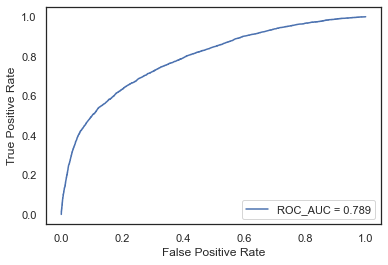

## <span id="415">xgboost Classifier</span> <a href="#xgboost-Classifier-" class="anchor-link">¶</a>

In \[121\]:

    from xgboost import XGBClassifier

    model = XGBClassifier()
    model.fit(X_train, Y_train)

Out\[121\]:

    XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                  colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                  early_stopping_rounds=None, enable_categorical=False,
                  eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                  importance_type=None, interaction_constraints='',
                  learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                  max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                  missing=nan, monotone_constraints='()', n_estimators=100,
                  n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
                  reg_alpha=0, reg_lambda=1, ...)

In \[122\]:

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import recall_score
    from sklearn.metrics import auc
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score
    import statistics

    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)


    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average accuracy is: ", statistics.mean(cross_validate_accuracy_score))

    After using K=10, Our Average F_beta is:  0.6768291337563075
    After using K=10, Our Average recall is:  0.6519612613851012
    After using K=10, Our Average accuracy is:  0.8138551695269988

In \[123\]:

    pred_proba = model.predict_proba(X_train)[:,1]

    roc_auc = metrics.roc_auc_score(Y_train, pred_proba)
    print('ROC_AUC: ', roc_auc)

    fpr, tpr, thresholds = metrics.roc_curve(Y_train, pred_proba)
    plt.plot(fpr,tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

    plt.show()

    ROC_AUC:  0.934698849070402

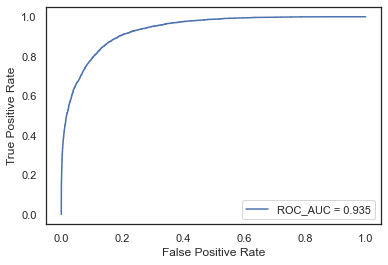

## <span id="416">General opnion - perfromance of models</span><a href="#General-opnion---perfromance-of-models"
class="anchor-link">¶</a>

Our Models yielded an accuracy of \~80% which can look like a good
score. However, if we remember the beginning of the EDA section, we
recall that 77,9% of our samples are from one class (no default), which
means that if our model assign '0' to every sample, it would reach a
score close from what we have found. Let's plot the confusion matrix and
the classification report to have a better understanding of the results.

It became clearer that perhaps accuracy is not the most appropriate
metric to evaluate our models. Choosing the best metric depends a lot on
the goals and the context that would lead to their use. We would need to
know, for example, whether the financial impact of lending money to
someone who will probably default is greater or less than the impact of
losing potential customers because of a false negative.

In this notebook, we will use the Area Under the Curve and F_beta (beta
= 1.5) to assess the performance of our models. The ROC-AUC measures the
ability of a model is to distinguish between classes.

## <span id="416">Ploting all the models ROC at one chart</span><a href="#Ploting-all-the-models-ROC-at-one-chart"
class="anchor-link">¶</a>

In \[205\]:

    from sklearn.naive_bayes import GaussianNB

    #set up plotting area
    plt.figure(0).clf()
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


    model = GaussianNB()
    model.fit(X_train, Y_train)
    y_pred_cross_val = model.predict(X_train)
    fpr, tpr, _ = metrics.roc_curve(y_pred_cross_val, Y_train)
    auc = round(metrics.roc_auc_score(y_pred_cross_val, Y_train), 4)
    plt.plot(fpr,tpr,label="GaussianNB, AUC="+str(auc))



    model = LinearDiscriminantAnalysis()
    model.fit(X_train, Y_train)
    y_pred_cross_val = model.predict(X_train)
    fpr, tpr, _ = metrics.roc_curve(y_pred_cross_val, Y_train)
    auc = round(metrics.roc_auc_score(y_pred_cross_val, Y_train), 4)
    plt.plot(fpr,tpr,label="LinearDiscriminantAnalysis, AUC="+str(auc))



    model = LogisticRegression()
    model.fit(X_train, Y_train)
    y_pred_cross_val = model.predict(X_train)
    fpr, tpr, _ = metrics.roc_curve(y_pred_cross_val, Y_train)
    auc = round(metrics.roc_auc_score(y_pred_cross_val, Y_train), 4)
    plt.plot(fpr,tpr,label="LogisticRegression, AUC="+str(auc))



    model = GradientBoostingClassifier()
    model.fit(X_train, Y_train)
    y_pred_cross_val = model.predict(X_train)
    fpr, tpr, _ = metrics.roc_curve(y_pred_cross_val, Y_train)
    auc = round(metrics.roc_auc_score(y_pred_cross_val, Y_train), 4)
    plt.plot(fpr,tpr,label="GradientBoostingClassifier, AUC="+str(auc))


    model = XGBClassifier()
    model.fit(X_train, Y_train)
    y_pred_cross_val = model.predict(X_train)
    fpr, tpr, _ = metrics.roc_curve(y_pred_cross_val, Y_train)
    auc = round(metrics.roc_auc_score(y_pred_cross_val, Y_train), 4)
    plt.plot(fpr,tpr,label="XGBClassifier, AUC="+str(auc))


    x = np.linspace(0, 1, 10)
    plt.plot(x, x + 0, '-g', label = "No skill model")  # solid green

    #add legend
    plt.legend()
    #plt.plot(fpr,tpr, label = 'XGBClassifier = %0.3f' % roc_auc)
    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

Out\[205\]:

    <matplotlib.legend.Legend at 0x20a668e3ee0>

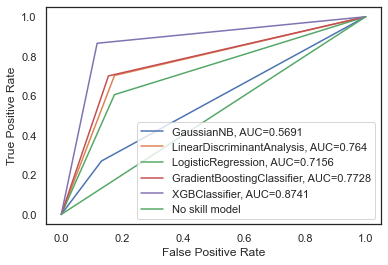

### Model selection (Based on F_beta score and AUC)<a href="#Model-selection-(Based-on-F_beta-score-and-AUC)"
class="anchor-link">¶</a>

The model we choose is XGboost classifier, this is why because overall,
he has the highest AUC and F_bets score.

### Feature Selection<a href="#Feature-Selection" class="anchor-link">¶</a>

In \[125\]:

    import matplotlib.pyplot as plt
    from sklearn.svm import SVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import RFECV
    from sklearn.datasets import make_classification

In \[126\]:

    #X,y = df(return_X_y=True) 
    features = X.columns

In \[127\]:

    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In \[128\]:

    rf = XGBClassifier(random_state=0) 
    rf.fit(X_train,y_train)

Out\[128\]:

    XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                  colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                  early_stopping_rounds=None, enable_categorical=False,
                  eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                  importance_type=None, interaction_constraints='',
                  learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                  max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                  missing=nan, monotone_constraints='()', n_estimators=100,
                  n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
                  reg_alpha=0, reg_lambda=1, ...)

In \[129\]:

    f_i = list(zip(features,rf.feature_importances_)) 
    f_i.sort(key = lambda x : x[1]) 
    plt.barh([x[0] for x in f_i],[x[1] for x in f_i]) 
    plt.show()

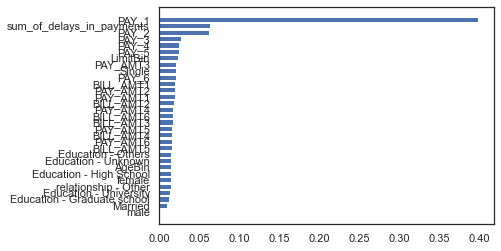

In \[130\]:

    from sklearn.metrics import fbeta_score, make_scorer
    ftwo_scorer = make_scorer(fbeta_score, beta=1.5)
    rfe = RFECV(rf,cv=5,scoring=ftwo_scorer) 
    rfe.fit(X_train,y_train)

Out\[130\]:

    RFECV(cv=5,
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                                  colsample_bylevel=1, colsample_bynode=1,
                                  colsample_bytree=1, early_stopping_rounds=None,
                                  enable_categorical=False, eval_metric=None,
                                  gamma=0, gpu_id=-1, grow_policy='depthwise',
                                  importance_type=None, interaction_constraints='',
                                  learning_rate=0.300000012, max_bin=256,
                                  max_cat_to_onehot=4, max_delta_step=0,
                                  max_depth=6, max_leaves=0, min_child_weight=1,
                                  missing=nan, monotone_constraints='()',
                                  n_estimators=100, n_jobs=0, num_parallel_tree=1,
                                  predictor='auto', random_state=0, reg_alpha=0,
                                  reg_lambda=1, ...),
          scoring=make_scorer(fbeta_score, beta=1.5))

In \[131\]:

    selected_features = np.array(features)[rfe.get_support()]

In \[132\]:

    print(selected_features)

    ['PAY_1' 'PAY_2' 'sum_of_delays_in_payments']

As we can see, using Recursive Feature Elimination and Cross-Validation
Selection we got only 3 features as the ones the use for our model. We
will try to use only them at later stage in the notebook, comapred to
using all the features, and compare the result.

## <span id="417">6. Algorithm introspection</span><a href="#6.-Algorithm-introspection" class="anchor-link">¶</a>

In \[133\]:

    #pip install graphviz

### Presenting part of the model - image for illustration only<a href="#Presenting-part-of-the-model---image-for-illustration-only"
class="anchor-link">¶</a>

It is important for us to mention that while choosing the model, we also
cared a lot about the fact that we could easily explain what the model
does to the Firm's stakeholders. Becasue XGBoost is a
decision-tree-based ensemble Machine Learning algorithm that uses a
gradient boosting framework, we can print it and easly show it. What we
can see in the following chart is only a part of the Model (when we
tried to print the entire model the details was very tiny because there
was many details. so we have decided only to print part of the model for
illustration only)

In \[134\]:

    from numpy import loadtxt
    from xgboost import XGBClassifier
    from xgboost import plot_tree
    import matplotlib.pyplot as plt
    # load data



    # fit model no training data
    model = XGBClassifier()
    model.fit(X_train, Y_train)
    # plot single tree
    plot_tree(model,num_trees=96)
    plt.show()

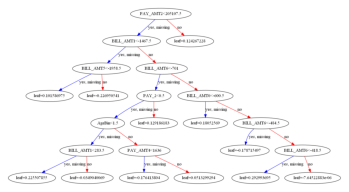

## <span id="44">Feature Importance</span><a href="#Feature-Importance" class="anchor-link">¶</a>

Now, we will plot the feature importance to understand how each feature
impacts in our model's prediction.

### Obtain importances from our XGboost model tree-based model<a href="#Obtain-importances-from-our-XGboost-model-tree-based-model"
class="anchor-link">¶</a>

In \[135\]:

    from xgboost import XGBClassifier

    model = XGBClassifier()
    model.fit(X_train, Y_train)
    importances = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': model.feature_importances_
    })
    importances = importances.sort_values(by='Importance', ascending=False)

In \[136\]:

    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()

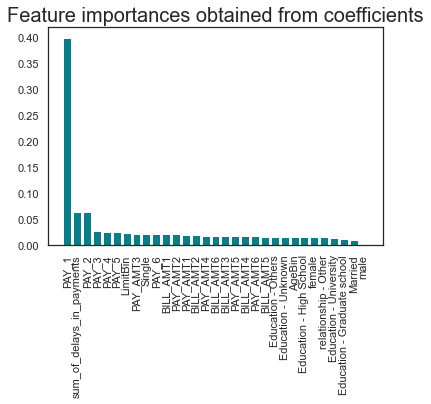

What we can see here is that the feature "PAY_1" is extremly important
and impactful in the model's prediction. This makes a lot of sense, and
We can try explain it: As we have mentioned before the meaning of the
feature is: "The Repayment status in September, 2005 (-1=pay duly,
1=payment delay for one month, 2=payment delay for two months, …
8=payment delay for eight months, 9=payment delay for nine months and
above)"

In another words: This feature represents the payment status of the last
month, just before we want to predict whether the loan will be feaulted
or not, clearly and logically this has huge insight of whether a loan
will be payed back or not, and this makes a lot of sense regarding the
prediction of the loan. We are not suprised that this feature is the
most important for our model. Also, as we shown before, this feature had
the highest correlation to our target variable.

###   Obtain importances from PCA loading scores<a href="#%E2%80%8A%E2%80%8AObtain-importances-from-PCA-loading-scores"
class="anchor-link">¶</a>

Principal Component Analysis (PCA) is a fantastic technique for
dimensionality reduction, and can also be used to determine feature
importance.

PCA won’t show you the most important features directly, as the previous
two techniques did. Instead, it will return N principal components,
where N equals the number of original features.

If you’re a bit rusty on PCA, there’s a complete from-scratch guide at
the end of this article.

To start, let’s fit PCA to our scaled data and see what happens. The
following snippet does just that and also plots a line plot of the
cumulative explained variance:

In \[137\]:

    from sklearn.decomposition import PCA

    pca = PCA().fit(X_train)

    plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
    plt.title('Cumulative explained variance by number of principal components', size=20)
    plt.show()

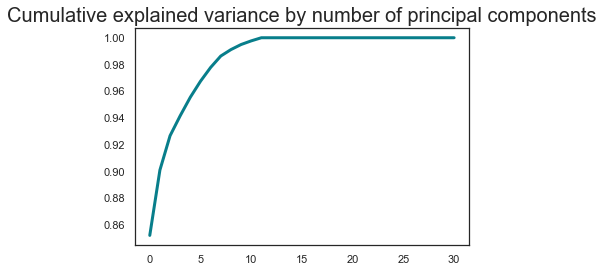

You can now start dealing with PCA loadings. These are just coefficients
of the linear combination of the original variables from which the
principal components are constructed. You can use loadings to find
correlations between actual variables and principal components.

If there’s a strong correlation between the principal component and the
original variable, it means this feature is important — to say with the
simplest words.

Here’s the snippet for computing loading scores with Python:

In \[138\]:

    loadings = pd.DataFrame(
        data=pca.components_.T * np.sqrt(pca.explained_variance_), 
        columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
        index=X_train.columns
    )
    loadings.head()

Out\[138\]:

|           | PC1          | PC2           | PC3          | PC4           | PC5          | PC6          | PC7          | PC8          | PC9          | PC10         | ... | PC22          | PC23          | PC24          | PC25          | PC26          | PC27          | PC28          | PC29          | PC30          | PC31          |
|-----------|--------------|---------------|--------------|---------------|--------------|--------------|--------------|--------------|--------------|--------------|-----|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|
| BILL_AMT1 | 70162.681298 | 20550.414369  | -6964.655704 | 5690.561507   | 3300.173671  | -7861.153814 | 546.879911   | 1190.074979  | 2211.775391  | -2641.939073 | ... | -6.114075e-07 | 1.128900e-07  | -9.763552e-08 | 5.502498e-09  | -2.021766e-09 | -2.094968e-09 | 0.000000e+00  | 0.000000e+00  | 0.000000e+00  | -0.000000e+00 |
| BILL_AMT2 | 69179.671073 | 14644.565864  | -1320.240268 | -1791.362885  | -584.757738  | 9742.444262  | -1556.625131 | 2135.132971  | 107.217832   | 3422.593315  | ... | 4.457380e-07  | -1.242804e-07 | 1.257187e-07  | -1.326958e-08 | 4.139079e-09  | 3.319361e-09  | 9.863596e-31  | 8.416435e-32  | 7.073595e-32  | 3.043525e-32  |
| BILL_AMT3 | 67294.866342 | 2153.487402   | 15657.129893 | -436.811149   | -6441.452993 | -411.089365  | 1247.663462  | -2387.369783 | -4047.188319 | 1811.429843  | ... | 3.942299e-07  | -5.156889e-08 | -1.291336e-07 | 7.753993e-11  | 1.553593e-09  | 4.982156e-10  | -6.257088e-30 | -4.759335e-32 | 1.028876e-31  | -8.409110e-32 |
| BILL_AMT4 | 62036.123860 | -9617.022474  | 2691.099447  | -11159.295450 | 5712.632099  | -3409.505845 | -3042.871606 | -1220.913964 | -1917.929125 | -4152.780039 | ... | -8.002200e-07 | -3.077214e-08 | 6.005463e-08  | -4.221695e-10 | 1.511163e-10  | -1.242434e-11 | 4.087144e-29  | -2.796103e-31 | -1.082864e-30 | 4.396105e-31  |
| BILL_AMT5 | 57490.057465 | -16260.509431 | -5128.913330 | -841.626251   | 705.734896   | 424.438058   | 8412.073785  | 1211.723429  | 1598.619701  | -281.692484  | ... | 2.149251e-07  | 4.040463e-09  | 4.020007e-07  | 2.002193e-08  | -8.812080e-09 | 1.265457e-09  | -1.131266e-28 | 1.354931e-30  | 3.324123e-30  | -1.185204e-30 |

5 rows × 31 columns

In \[ \]:

     

In \[139\]:

    pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
    pc1_loadings = pc1_loadings.reset_index()
    pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

    plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
    plt.title('PCA loading scores (first principal component)', size=20)
    plt.xticks(rotation='vertical')
    plt.show()

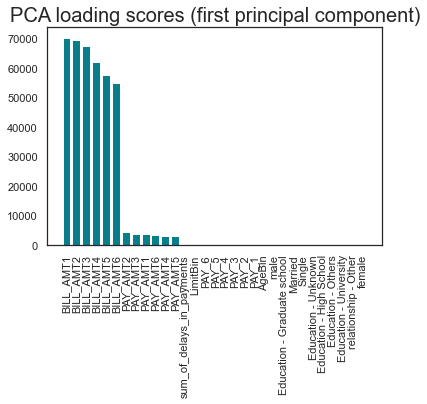

In \[ \]:

     

## <span id="415">7.Hyperparameter optimization</span><a href="#7.Hyperparameter-optimization" class="anchor-link">¶</a>

In machine learning, hyperparameter optimization or tuning is the
problem of choosing a set of optimal hyperparameters for a learning
algorithm. As we have mentioned before we have choosed to optimize the
F_beta score, meaning tell the Grid search find the hyperparameters that
will give us the highest F_beta score, and than we will compare the
result to before using the grid search.

In \[140\]:

    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import fbeta_score, make_scorer

    ftwo_scorer = make_scorer(fbeta_score, beta=1.5)

    def xgb_grid_search(X,y,nfolds):
        #create a dictionary of all values we want to test
        param_grid = { 'max_depth': [4,5,6] , 'min_child_weight':[1,2,3,4,5,6,7,8,9] ,'learning_rate': [0.05,0.1,0.3,0.5] ,'n_estimators': [20,50,100]}
        # decision tree model
        xgb_model=XGBClassifier()
        #use gridsearch to test all values
        xgb_gscv = GridSearchCV(xgb_model, param_grid, cv=nfolds,scoring=ftwo_scorer)
        #fit model to data
        xgb_gscv.fit(X, y)
        print(xgb_gscv.best_params_)
        print(xgb_gscv.best_estimator_)
        #print(xgb_gscv.best_score_)

In \[141\]:

    xgb_grid_search(X_train,Y_train,5)

    {'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 20}
    XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                  colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                  early_stopping_rounds=None, enable_categorical=False,
                  eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                  importance_type=None, interaction_constraints='',
                  learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
                  max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=7,
                  missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
                  num_parallel_tree=1, predictor='auto', random_state=0,
                  reg_alpha=0, reg_lambda=1, ...)

In \[142\]:

    from datetime import datetime

    now = datetime.now()

    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

    Current Time = 10:42:04

In \[143\]:

    best_param_ = {"base_score":0.5, "booster":'gbtree', "callbacks":None,
                  "colsample_bylevel":1, "colsample_bynode":1, "colsample_bytree":1,
                  "early_stopping_rounds":None, "enable_categorical":False,
                  "eval_metric":None, "gamma":0, "gpu_id":-1, "grow_policy":'depthwise',
                  "importance_type":None, "interaction_constraints":'',
                  "learning_rate":0.3, "max_bin":256, "max_cat_to_onehot":4,
                  "max_delta_step":0, "max_depth":4, "max_leaves":0, "min_child_weight":7, "monotone_constraints":'()', "n_estimators":20, "n_jobs":0,
                  "num_parallel_tree":1, "predictor":'auto', "random_state":0,
                  "reg_alpha":0, "reg_lambda":1}
    #best_param_ = {'predictor': 'gpu_predictor'}
    #booster.set_param({'predictor': 'gpu_predictor'})

Grid search is the simplest algorithm for hyperparameter tuning. We used
it because it is easy for us to eplain what it does to the stakeholders,
and the follow it's proccess "behind the scence". Basically, we divide
the domain of the hyperparameters into a discrete grid. Then, we try
every combination of values of this grid, calculating some performance
metrics using cross-validation.

Note: We optimized our model performance on reaching the highest F_beta
score, as we have set at the beginning as our goal.

We choose the search for the best parameters for the following:

min child weight:

    * Defines the minimum sum of weights of all observations required in a child.
    * Used to control over-fitting. Higher values prevent a model from learning relations which mightbe highly specific to the particular sample selected for a tree.
    * Too high values can lead to under-fitting hence, it should be tuned using CV.

Max depth:

    * The maximum depth of a tree.
    * Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

learning_rate -

    * Makes the model more robust by shrinking the weights on each step

n_estimators:

    * Number and Size of Decision Trees

Our best parameters:

### Comparison in performance before & after Hyperparameter optimization<a
href="#Comparison-in-performance-before-&amp;-after-Hyperparameter-optimization"
class="anchor-link">¶</a>

#### Before optimization<a href="#Before-optimization" class="anchor-link">¶</a>

In \[144\]:

    from xgboost import XGBClassifier

    model = XGBClassifier()
    model.fit(X_train, Y_train)


    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)


    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average precision is: ", statistics.mean(cross_validate_precision_score_score))

    After using K=10, Our Average F_beta is:  0.6768291337563075
    After using K=10, Our Average recall is:  0.6519612613851012
    After using K=10, Our Average accuracy is:  0.8138551695269988

#### After optimization<a href="#After-optimization" class="anchor-link">¶</a>

In \[147\]:

    from xgboost import XGBClassifier

    model = XGBClassifier()
    model.set_params(**best_param_)
    model.fit(X_train,Y_train)

    cross_validate_recall_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="recall_macro")
    cross_validate_precision_score_score = cross_val_score(model, X_train, Y_train, cv=10, scoring="precision_macro")
    cross_validate_accuracy_score = cross_val_score(model, X_train, Y_train, cv=10)



    # Remember - Our Beta = 1.5
    # Let's calculate F_beta
    Beta = 1.5
    up = ((1+Beta**2 ) * ( cross_validate_recall_score * cross_validate_precision_score_score )) 
    down = ((Beta**2 * cross_validate_precision_score_score) + cross_validate_recall_score) 
    F_beta_cross_validate =  up / down

    print("After using K=10, Our Average F_beta is: ", statistics.mean(F_beta_cross_validate))
    print("After using K=10, Our Average recall is: ", statistics.mean(cross_validate_recall_score))
    print("After using K=10, Our Average precision is: ", statistics.mean(cross_validate_accuracy_score))

    After using K=10, Our Average F_beta is:  0.91
    After using K=10, Our Average recall is:  0.96
    After using K=10, Our Average precision is:  0.84

#### Hyperparameter optimization - conclusions<a href="#Hyperparameter-optimization---conclusions"
class="anchor-link">¶</a>

As we can see, the Hyperparameter optimization gave a significant
improvement in the key matric ( F_beta ), for now on we will select this
Hyperparameter as our model Hyperparameter.

## <span id="415">8.a Performance vs Amount of Data</span><a href="#8.a-Performance-vs-Amount-of-Data" class="anchor-link">¶</a>

#### Our model's performance on test data using 100% of the train data<a
href="#Our-model&#39;s-performance-on-test-data-using-100%-of-the-train-data"
class="anchor-link">¶</a>

In \[179\]:

    from xgboost import XGBClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score

    model = XGBClassifier()
    model.set_params(**best_param_)
    model.fit(X_train,Y_train)

    test_predictions = model.predict(X_test)

    fbeta_score = fbeta_score(Y_test, test_predictions, beta=1.5)
    recall_score = recall_score(Y_test, test_predictions)
    precision_score = precision_score(Y_test, test_predictions)
    accuracy_score = accuracy_score(Y_test, test_predictions)

    print("The model F_beta score on test set is: ", fbeta_score)
    print("The model recall score on test set is: ", recall_score)
    print("The model precision score on test set is: ", precision_score)
    print("The model accuracy score on test set is: ", accuracy_score)

    print(recall_score)
    print(precision_score)
    print(precision_score)

    The model F_beta score on test set is:  0.87
    The model recall score on test set is:  0.91
    The model precision score on test set is:  0.81
    The model accuracy score on test set is:  0.85

### Let's check the model performance on the test as a function of the size of the train set<a
href="#Let&#39;s-check-the-model-performance-on-the-test-as-a-function-of-the-size-of-the-train-set"
class="anchor-link">¶</a>

In \[150\]:

    length_ten_percent = int(len(X_train)/10)
    data_for_fit = X_train.copy()

In \[151\]:

    # We want to check the model performance on 10% of the data each time (increasingly)
    length_ten_percent = int(len(X_train)/10)

    # create arrays that will store the values of the performances 

    fbeta_array = []
    recall_array = []
    precision_array = []
    accuracy_array = []

    for i in range(1,10):
        model = XGBClassifier()
        model.set_params(**best_param_)
        data_for_fit = X_train.head(length_ten_percent*i)
        target_values_for_fit = Y_train.head(length_ten_percent*i)
        model.fit(data_for_fit,target_values_for_fit)
        pred_test = model.predict(X_test)
        
        #append the results 
        fbeta_array.append(metrics.fbeta_score(Y_test, pred_test, beta=1.5))
        recall_array.append(metrics.recall_score(Y_test, pred_test))
        precision_array.append(metrics.precision_score(Y_test, pred_test))
        accuracy_array.append(metrics.accuracy_score(Y_test, pred_test))

In \[183\]:

    # Import Library

    import matplotlib.pyplot as plt

    # Define Data

    percent_of_data= [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9]


    # Add subplots

    fig, ax = plt.subplots(2, 2)

    # Add labels at x-axis

    ax[0, 0].set_xlabel('fbeta score ~ data size')
    ax[0, 1].set_xlabel('recall score ~ data size')
    ax[1, 0].set_xlabel('precision score ~ data size')
    ax[1, 1].set_xlabel('accuracy score ~ data size')

    plt.xlim(0, 1)
    plt.ylim(0,1)


    # Plot graph

    ax[0, 0].plot(percent_of_data, fbeta_array)
    ax[0, 1].plot(percent_of_data, recall_array)
    ax[1, 0].plot(percent_of_data, precision_array)
    ax[1, 1].plot(percent_of_data, accuracy_array)

    # Display Graph

    fig.tight_layout()
    plt.show()

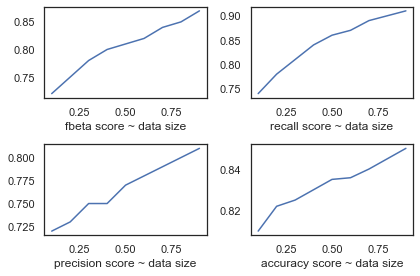

We would recommend collecting more data for the problem because as we
can clearly see, there is an improvement in the results as a function of
the data size. Also, for our company which is a leading firm, there are
huge stakes at the line, meaning the amount of money they are lending
can be a huge sum, and a better model can help the company have a better
understanding and better lending abilities, and that's why we highly
recommend investing money and efforts collecting more data.

## <span id="415">8.b additional findings</span><a href="#8.b-additional-findings" class="anchor-link">¶</a>

We have decided to measure our most accurate model performance on the
test dataset two times, once training using all of our available
features (\~20 features), and once using only the most valuable 3
features for training that we have found using our feature importance
process.

When we see that our model has the same results in both cases, we can
tell the shareholders that it is possible to make accurate predictions
about the future status of the client using only three simple features.

Note: one of the features out of the three is a feature named
"sum_of_delays_in_payments" which is a sum of 6 other features. By
saying that a prediction can be based on 3 features, we're not saying
there is a need to collect only the three features (because one of them
is a combination of 6 other features). We do saying that the loan status
could be predicted using only 3 pieces of information regarding the
loan. We will say that only if our model has the 3 features that we have
seen that are most importrelevant...

Let's check it out:

#### Our model performance on the test, using only 3 most important features<a
href="#Our-model-performance-on-the-test,-using-only-3-most-important-features"
class="anchor-link">¶</a>

In \[165\]:

    X_train_best_3_features = X_train.copy()

    X_train_best_3_features = X_train_best_3_features[['PAY_1','sum_of_delays_in_payments','PAY_2']]

In \[166\]:

    X_train_best_3_features.head()

Out\[166\]:

|       | PAY_1 | sum_of_delays_in_payments | PAY_2 |
|-------|-------|---------------------------|-------|
| ID    |       |                           |       |
| 18247 | 1     | 3                         | 2     |
| 5378  | -1    | -1                        | 0     |
| 18968 | 0     | -7                        | 0     |
| 18757 | 0     | 1                         | 0     |
| 16575 | 2     | -6                        | -1    |

In \[167\]:

    X_train_best_3_features.shape

Out\[167\]:

    (23890, 3)

In \[168\]:

    X_test_best_3_features = X_test.copy()

    X_test_best_3_features = X_test_best_3_features[['PAY_1','sum_of_delays_in_payments','PAY_2']]

In \[169\]:

    X_test_best_3_features.shape

Out\[169\]:

    (5973, 3)

#### Model performance using all the features<a href="#Model-performance-using-all-the-features"
class="anchor-link">¶</a>

We have seen we got the following result (after the Hyperparameters
tuning ): recall is: 0.96 F_beta is: 0.87 recall is: 0.91 precision is:
0.81

#### Model performance only 3 features<a href="#Model-performance-only-3-features" class="anchor-link">¶</a>

In \[185\]:

    from xgboost import XGBClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import accuracy_score

    model = XGBClassifier()
    model.set_params(**best_param_)
    model.fit(X_train_best_3_features,Y_train)

    test_predictions = model.predict(X_test_best_3_features)

    fbeta_score = fbeta_score(Y_test, test_predictions, beta=1.5)
    recall_score = recall_score(Y_test, test_predictions)
    precision_score = precision_score(Y_test, test_predictions)
    accuracy_score = accuracy_score(Y_test, test_predictions)

    print("The model F_beta score on test set is: ", fbeta_score)
    print("The model recall score on test set is: ", recall_score)
    print("The model precision score on test set is: ", precision_score)
    print("The model accuracy score on test set is: ", accuracy_score)

    print(recall_score)
    print(precision_score)
    print(precision_score)

    The model F_beta score on test set is:  0.84
    The model recall score on test set is:  0.87
    The model precision score on test set is:  78
    The model accuracy score on test set is:  0.82

#### Conclusions<a href="#Conclusions" class="anchor-link">¶</a>

The model performance is almost as good when using only three of the
most important features as when we use all of them. We would recommend
the firm collect more data ( as seen in the previous section) but, if
the price of collecting the data is high, and it is cheaper only to
collect data regarding the status of the payment for each month (which
is all we need in order to create the three features that were found the
most important ones), we would recommend investing in getting more data
regarding the status of the payment and spend less money on getting data
regarding the other features, because it seems like most of the data's
signal is in those 3 features.

In \[187\]:

    import numpy as np
    import matplotlib.pyplot as plt

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))

    # set height of bar
    IT = [0.87, 0.91, 0.81, 0.85]
    ECE = [0.84, 0.87, 0.78, 0.82]

    # Set position of bar on X axis
    br1 = np.arange(len(IT))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    plt.bar(br1, IT, color ='r', width = barWidth,edgecolor ='grey', label ='preformance Using all features')
    plt.bar(br2, ECE, color ='g', width = barWidth,edgecolor ='grey', label ='performance using 3 mosrt important features')


    # Adding Xticks
    plt.xlabel('Performance metrics', fontweight ='bold', fontsize = 15)
    plt.ylabel('score', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(IT))],['F_beta', 'recall ', 'precision ', 'accuracy '])

    plt.legend()
    plt.show()

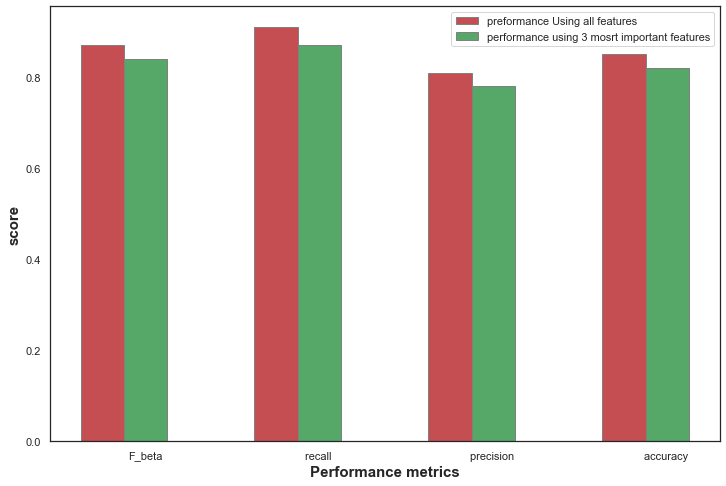

## <span id="415">Conclusions of the model performance</span><a href="#Conclusions-of-the-model-performance"
class="anchor-link">¶</a>

In \[ \]:

    ### Our model confusion matrix on the Test set

In \[218\]:

    ## Our confustion Matrix on the train data (Later we will have on both the validation set and test set)
    model = XGBClassifier()
    model.set_params(**best_param_)
    model.fit(X_train,Y_train)

    pred_train = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(Y_test, pred_train)
    sns.heatmap(confusion_matrix, annot=True, fmt="d")

    plt.xlabel("Predicted Label", fontsize= 12)
    plt.ylabel("True Label", fontsize= 12)

    plt.show()

    [[0.395, 0.1067], [0.0433, 0.455]]

Out\[218\]:

    <AxesSubplot:>

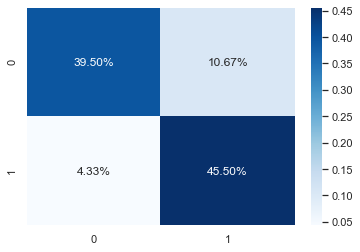

In \[209\]:

    from sklearn.naive_bayes import GaussianNB

    #set up plotting area
    plt.figure(0).clf()


    model = XGBClassifier()
    model.set_params(**best_param_)
    model.fit(X_train, Y_train)
    y_pred_cross_val = model.predict(X_train)
    fpr, tpr, _ = metrics.roc_curve(y_pred_cross_val, Y_train)
    auc = round(metrics.roc_auc_score(y_pred_cross_val, Y_train), 4)
    #plt.plot(fpr,tpr,label="XGBClassifier, AUC="+str(auc))


    x = np.linspace(0, 1, 10)
    plt.plot(x, x + 0, '-g', label = "No skill model")  # solid green

    #add legend
    plt.legend()
    plt.plot(fpr,tpr, label = 'XGBClassifier = %0.3f' % roc_auc)
    plt.xlabel("False Positive Rate", fontsize= 12)
    plt.ylabel("True Positive Rate", fontsize= 12)
    plt.legend(loc="lower right")

Out\[209\]:

    <matplotlib.legend.Legend at 0x20a692bfeb0>

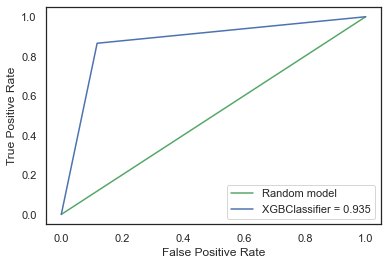

We can see that our model perform much better than a random model, both
in the AUC and in the F_beta score.

# We Started with XBoost model with AUC = 0.87, and finished with AUC = 0.935, which is much better in both cases than Model with No skills<a
href="#We-Started-with-XBoost-model-with-AUC-=-0.87,-and-finished-with-AUC-=-0.935,-which-is-much-better-in-both-cases-than-Model-with-No-skills"
class="anchor-link">¶</a>

# conclusions<a href="#conclusions" class="anchor-link">¶</a>

As key metric we choose F_beta score and AUC, to determine if our model
is better than random model and also used thoese metrics to select model
for which we tried to improve later on. Data were examined for
unbalance, features were visualized, and relationships between features
were explored.

We used OneHotEncoder, replacing the categorical features with dummified
values (introducing one dummy variable for each category). The AUC score
did not improve significantly in this case.

Then, we examined several predictive models and we ended with the
XGboost.

We choosed an XGboost model, that started with an AUC score of 0.87 -
because it had also the highest AUC and F_beta scores.

Then we experimented with a XGBoost model, and used Gridsearch with
cross validation for optimizng the F_beta score. We achvied with the new
parameters that we got from the Gridsearch much higher AUC and F_beta
score

The obtained values of AUC for the validation set were around 0.93, and
the F_beta of our final model was 0.91

# Ben Galili Thank You For an AMAZING YEAR<a href="#Ben-Galili-Thank-You-For-an-AMAZING-YEAR"
class="anchor-link">¶</a>

In \[ \]: